<a href="https://colab.research.google.com/github/ShreyaBiltheria/PRODIGY_DS_05/blob/main/PRODIGY_DS_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

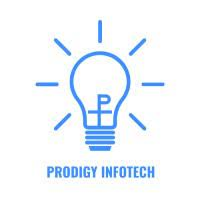

#**PRODIGY INFOTECH DATA SCIENCE INTERNSHIP**

#**BY SHREYA BILTHERIA**

#**Task 5 :- Analyze traffic accident data to identify patterns related to road conditions, weather, and time of day. Visualize accident hotspots and contributing factors.**

Analyzing the US accident dataset spanning from 2016 to 2023 provides valuable insights into the patterns related to road conditions, weather, and time of day. By delving into this extensive dataset, it becomes possible to identify trends and correlations that contribute to traffic accidents. Visualizing accident hotspots allows for a more targeted approach to addressing safety concerns in specific regions. Additionally, examining contributing factors such as road conditions and weather helps in understanding the root causes of accidents, enabling the development of preventive measures. Through this comprehensive analysis, stakeholders can make informed decisions to improve road safety, implement effective traffic management strategies, and reduce the overall occurrence of accidents.

#IMPORTING LIBRARIES AND LOADING THE DATASET



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data_filepath = "/content/US_Accidents_March23_sampled_500k.csv"

In [ ]:
df = pd.read_csv(data_filepath)
df.head(10)

<ipython-input-3-30d686ca95d2>:1: DtypeWarning: Columns (29,30,31,32,33,34,35,36,37,38,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_filepath)


ID   Source  Severity                     Start_Time  \
0  A-2047758  Source2         2            2019-06-12 10:10:56   
1  A-4694324  Source1         2  2022-12-03 23:37:14.000000000   
2  A-5006183  Source1         2  2022-08-20 13:13:00.000000000   
3  A-4237356  Source1         2            2022-02-21 17:43:04   
4  A-6690583  Source1         2            2020-12-04 01:46:00   
5  A-1101469  Source2         2            2021-03-29 07:03:58   
6  A-7222249  Source1         2            2020-01-14 16:49:23   
7  A-6198239  Source1         2  2021-08-13 16:48:00.000000000   
8  A-4222549  Source1         2            2022-10-12 13:59:30   
9  A-5924038  Source1         2            2021-10-21 07:39:30   

                        End_Time  Start_Lat   Start_Lng    End_Lat  \
0            2019-06-12 10:55:58  30.641211  -91.153481        NaN   
1  2022-12-04 01:56:53.000000000  38.990562  -77.399070  38.990037   
2  2022-08-20 15:22:45.000000000  34.661189 -120.492822  34.661189   
3            2022-02-21 19:43:23  43.680592  -92.993317  43.680574   
4            2020-12-04 04:13:09  35.395484 -118.985176  35.395476   
5            2021-03-29 08:51:01  42.532082  -70.944267        NaN   
6            2020-01-14 20:49:23  42.421280 -123.119450  42.421280   
7  2021-08-13 19:09:09.000000000  30.191010  -85.682508  30.190329   
8            2022-10-12 15:33:53  32.868947  -96.804018  32.869500   
9            2021-10-21 09:24:30  39.717218  -86.124691  39.733478   

      End_Lng  Distance(mi)  ... Roundabout Station   Stop Traffic_Calming  \
0         NaN         0.000  ...      False   False  False           False   
1  -77.398282         0.056  ...      False   False  False           False   
2 -120.492442         0.022  ...      False   False  False           False   
3  -92.972223         1.054  ...      False   False  False           False   
4 -118.985995         0.046  ...      False   False  False           False   
5         NaN         0.000  ...      False   False  False           False   
6 -123.119450         0.000  ...      False   False  False           False   
7  -85.682530         0.047  ...      False   False  False           False   
8  -96.804014         0.038  ...      False    True  False           False   
9  -86.137021         1.301  ...      False   False  False           False   

  Traffic_Signal Turning_Loop Sunrise_Sunset Civil_Twilight Nautical_Twilight  \
0           True        False            Day            Day               Day   
1          False        False          Night          Night             Night   
2           True        False            Day            Day               Day   
3          False        False            Day            Day               Day   
4          False        False          Night          Night             Night   
5           True        False            Day            Day               Day   
6          False        False            Day            Day               Day   
7          False        False            Day            Day               Day   
8          False        False            Day            Day               Day   
9          False        False          Night            Day               Day   

  Astronomical_Twilight  
0                   Day  
1                 Night  
2                   Day  
3                   Day  
4                 Night  
5                   Day  
6                   Day  
7                   Day  
8                   Day  
9                   Day  

[10 rows x 46 columns]

#BASIC UNDERSTANDING OF DATASET

In [ ]:
# displaying first 5 rows
df.head()

ID   Source  Severity                     Start_Time  \
0  A-2047758  Source2         2            2019-06-12 10:10:56   
1  A-4694324  Source1         2  2022-12-03 23:37:14.000000000   
2  A-5006183  Source1         2  2022-08-20 13:13:00.000000000   
3  A-4237356  Source1         2            2022-02-21 17:43:04   
4  A-6690583  Source1         2            2020-12-04 01:46:00   

                        End_Time  Start_Lat   Start_Lng    End_Lat  \
0            2019-06-12 10:55:58  30.641211  -91.153481        NaN   
1  2022-12-04 01:56:53.000000000  38.990562  -77.399070  38.990037   
2  2022-08-20 15:22:45.000000000  34.661189 -120.492822  34.661189   
3            2022-02-21 19:43:23  43.680592  -92.993317  43.680574   
4            2020-12-04 04:13:09  35.395484 -118.985176  35.395476   

      End_Lng  Distance(mi)  ... Roundabout Station   Stop Traffic_Calming  \
0         NaN         0.000  ...      False   False  False           False   
1  -77.398282         0.056  ...      False   False  False           False   
2 -120.492442         0.022  ...      False   False  False           False   
3  -92.972223         1.054  ...      False   False  False           False   
4 -118.985995         0.046  ...      False   False  False           False   

  Traffic_Signal Turning_Loop Sunrise_Sunset Civil_Twilight Nautical_Twilight  \
0           True        False            Day            Day               Day   
1          False        False          Night          Night             Night   
2           True        False            Day            Day               Day   
3          False        False            Day            Day               Day   
4          False        False          Night          Night             Night   

  Astronomical_Twilight  
0                   Day  
1                 Night  
2                   Day  
3                   Day  
4                 Night  

[5 rows x 46 columns]

In [ ]:
# displaying last 5 rows
df.tail()

ID   Source  Severity           Start_Time             End_Time  \
23960  A-1292211  Source2         2  2020-09-09 06:02:07  2020-09-09 06:46:39   
23961    A-42581  Source2         2  2016-06-18 11:19:21  2016-06-18 11:49:21   
23962  A-4120474  Source1         2  2022-10-06 17:20:12  2022-10-06 18:28:20   
23963  A-3193181  Source2         3  2017-11-18 11:22:45  2017-11-18 11:51:57   
23964  A-4987376  Source1         2  2022-06-25 05:26:30  2022-06-25 05:58:30   

       Start_Lat   Start_Lng    End_Lat    End_Lng  Distance(mi)  ...  \
23960  33.919376  -84.357933        NaN        NaN         0.000  ...   
23961  37.797668 -121.143166        NaN        NaN         0.000  ...   
23962  28.385298  -81.244348  28.391948 -81.244250         0.460  ...   
23963  30.578346  -84.699806        NaN        NaN         0.000  ...   
23964  42.146900  -87.879224  42.150314 -87.873994         0.357  ...   

      Roundabout Station   Stop Traffic_Calming Traffic_Signal Turning_Loop  \
23960      False   False  False           False          False        False   
23961      False   False  False           False           True        False   
23962      False   False  False           False          False        False   
23963      False   False  False           False          False        False   
23964        NaN     NaN    NaN             NaN            NaN          NaN   

      Sunrise_Sunset Civil_Twilight Nautical_Twilight Astronomical_Twilight  
23960          Night          Night             Night                   Day  
23961            Day            Day               Day                   Day  
23962            Day            Day               Day                   Day  
23963            Day            Day               Day                   Day  
23964            NaN            NaN               NaN                   NaN  

[5 rows x 46 columns]

In [ ]:
# showing dimensions of the dataset
df.shape

(23965, 46)

In [ ]:
#showing size of dataset
df.size

1102390

In [ ]:
# showing column names
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [ ]:
# checking data types
df.dtypes

ID                        object
Source                    object
Severity                   int64
Start_Time                object
End_Time                  object
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description               object
Street                    object
City                      object
County                    object
State                     object
Zipcode                   object
Country                   object
Timezone                  object
Airport_Code              object
Weather_Timestamp         object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction            object
Wind_Speed(mph)          float64
Precipitation(in)        float64
Weather_Condition         object
Amenity                   object
Bump      

In [ ]:
# checking for different data types
df.dtypes.value_counts()

object     33
float64    12
int64       1
dtype: int64

In [ ]:
# getting information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23965 entries, 0 to 23964
Data columns (total 46 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     23965 non-null  object 
 1   Source                 23965 non-null  object 
 2   Severity               23965 non-null  int64  
 3   Start_Time             23965 non-null  object 
 4   End_Time               23965 non-null  object 
 5   Start_Lat              23965 non-null  float64
 6   Start_Lng              23965 non-null  float64
 7   End_Lat                13219 non-null  float64
 8   End_Lng                13219 non-null  float64
 9   Distance(mi)           23965 non-null  float64
 10  Description            23965 non-null  object 
 11  Street                 23935 non-null  object 
 12  City                   23965 non-null  object 
 13  County                 23965 non-null  object 
 14  State                  23965 non-null  object 
 15  Zi

In [ ]:
#showing statistical summary of the dataset
df.describe()

Severity     Start_Lat     Start_Lng       End_Lat       End_Lng  \
count  23965.000000  23965.000000  23965.000000  13219.000000  13219.000000   
mean       2.212643     36.235185    -94.920586     36.264553    -96.012093   
std        0.482993      5.083408     17.456554      5.255605     18.140017   
min        1.000000     24.668043   -124.482110     24.667779   -124.482110   
25%        2.000000     33.440773   -117.295884     33.508127   -117.837525   
50%        2.000000     35.841911    -87.916573     36.156550    -89.645644   
75%        2.000000     40.109333    -80.372764     40.186533    -80.284330   
max        4.000000     48.895210    -69.648220     48.911790    -69.648220   

       Distance(mi)  Temperature(F)  Wind_Chill(F)   Humidity(%)  \
count  23965.000000    23460.000000   17745.000000  23428.000000   
mean       0.540615       61.597191      58.140440     65.068935   
std        1.643237       18.921062      22.315879     22.906281   
min        0.000000      -35.000000     -53.200000      3.000000   
25%        0.000000       49.000000      43.000000     49.000000   
50%        0.025000       64.000000      62.000000     67.000000   
75%        0.449000       76.000000      75.000000     85.000000   
max       99.762000      115.000000     111.000000    100.000000   

       Pressure(in)  Visibility(mi)  Wind_Speed(mph)  Precipitation(in)  
count  23540.000000    23437.000000     22206.000000       17131.000000  
mean      29.536173        9.073163         7.728623           0.007580  
std        1.006274        2.828786         5.350553           0.049269  
min       19.360000        0.000000         0.000000           0.000000  
25%       29.360000       10.000000         4.600000           0.000000  
50%       29.860000       10.000000         7.000000           0.000000  
75%       30.030000       10.000000        10.400000           0.000000  
max       30.890000      120.000000       142.000000           2.160000

In [ ]:
#transposes the summary statistics generated by the describe()
df.describe().transpose()

count       mean        std         min         25%  \
Severity           23965.0   2.212643   0.482993    1.000000    2.000000   
Start_Lat          23965.0  36.235185   5.083408   24.668043   33.440773   
Start_Lng          23965.0 -94.920586  17.456554 -124.482110 -117.295884   
End_Lat            13219.0  36.264553   5.255605   24.667779   33.508127   
End_Lng            13219.0 -96.012093  18.140017 -124.482110 -117.837525   
Distance(mi)       23965.0   0.540615   1.643237    0.000000    0.000000   
Temperature(F)     23460.0  61.597191  18.921062  -35.000000   49.000000   
Wind_Chill(F)      17745.0  58.140440  22.315879  -53.200000   43.000000   
Humidity(%)        23428.0  65.068935  22.906281    3.000000   49.000000   
Pressure(in)       23540.0  29.536173   1.006274   19.360000   29.360000   
Visibility(mi)     23437.0   9.073163   2.828786    0.000000   10.000000   
Wind_Speed(mph)    22206.0   7.728623   5.350553    0.000000    4.600000   
Precipitation(in)  17131.0   0.007580   0.049269    0.000000    0.000000   

                         50%        75%        max  
Severity            2.000000   2.000000    4.00000  
Start_Lat          35.841911  40.109333   48.89521  
Start_Lng         -87.916573 -80.372764  -69.64822  
End_Lat            36.156550  40.186533   48.91179  
End_Lng           -89.645644 -80.284330  -69.64822  
Distance(mi)        0.025000   0.449000   99.76200  
Temperature(F)     64.000000  76.000000  115.00000  
Wind_Chill(F)      62.000000  75.000000  111.00000  
Humidity(%)        67.000000  85.000000  100.00000  
Pressure(in)       29.860000  30.030000   30.89000  
Visibility(mi)     10.000000  10.000000  120.00000  
Wind_Speed(mph)     7.000000  10.400000  142.00000  
Precipitation(in)   0.000000   0.000000    2.16000

#DATA PREPROCESSING,EDA AND VISUALIZATION

In [ ]:
# Checking the columns in the data
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [ ]:
print("Number of columns: ",len(df.columns))
print("Number of rows: ",len(df))

Number of columns:  46
Number of rows:  23965


In [ ]:
len(df.select_dtypes(['int64', 'float64']).columns)

13

##CHECKING FOR NULL VALUES

In [ ]:
#computes the sum of null values for each column in the DataFrame df
df.isnull().sum()

ID                           0
Source                       0
Severity                     0
Start_Time                   0
End_Time                     0
Start_Lat                    0
Start_Lng                    0
End_Lat                  10746
End_Lng                  10746
Distance(mi)                 0
Description                  0
Street                      30
City                         0
County                       0
State                        0
Zipcode                      5
Country                      0
Timezone                    24
Airport_Code                74
Weather_Timestamp          364
Temperature(F)             505
Wind_Chill(F)             6220
Humidity(%)                537
Pressure(in)               425
Visibility(mi)             528
Wind_Direction             528
Wind_Speed(mph)           1759
Precipitation(in)         6834
Weather_Condition          528
Amenity                      1
Bump                         1
Crossing                     1
Give_Way

In [ ]:
#finding percentage of missing data per columns
df.isna().sum().sort_values(ascending=False) * 100. / len(df)

End_Lat                  44.840392
End_Lng                  44.840392
Precipitation(in)        28.516587
Wind_Chill(F)            25.954517
Wind_Speed(mph)           7.339871
Humidity(%)               2.240768
Weather_Condition         2.203213
Wind_Direction            2.203213
Visibility(mi)            2.203213
Temperature(F)            2.107240
Pressure(in)              1.773420
Weather_Timestamp         1.518882
Airport_Code              0.308784
Nautical_Twilight         0.287920
Civil_Twilight            0.287920
Sunrise_Sunset            0.287920
Astronomical_Twilight     0.287920
Street                    0.125183
Timezone                  0.100146
Zipcode                   0.020864
Give_Way                  0.004173
Turning_Loop              0.004173
Traffic_Signal            0.004173
Traffic_Calming           0.004173
Stop                      0.004173
Station                   0.004173
Roundabout                0.004173
Railway                   0.004173
No_Exit             

<Axes: >

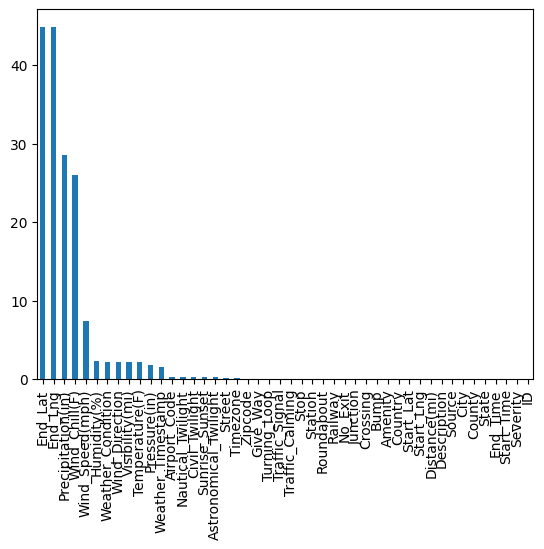

In [ ]:
# Plotting a Pandas.Series data (missing data visualization)
missing_data = df.isna().sum().sort_values(ascending=False) * 100. / len(df)
type(missing_data)
missing_data.plot(kind='bar')

<Axes: >

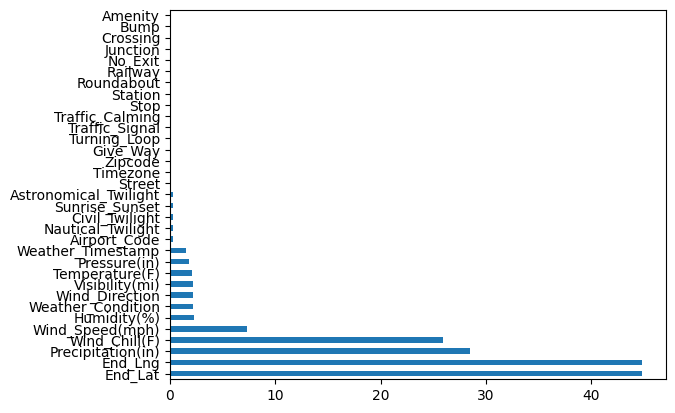

In [ ]:
missing_data[missing_data!=0].plot(kind='barh')

##CITY COLUMN ANALYSIS

In [ ]:
df.City

0            Zachary
1           Sterling
2             Lompoc
3             Austin
4        Bakersfield
            ...     
23960        Atlanta
23961          Ripon
23962        Orlando
23963         Quincy
23964     Northbrook
Name: City, Length: 23965, dtype: object

In [ ]:
cities = df.City.unique()
len(cities)

3829

##STATE COLUMN ANALYSIS

In [ ]:
df.State

0        LA
1        VA
2        CA
3        MN
4        CA
         ..
23960    GA
23961    CA
23962    FL
23963    FL
23964    IL
Name: State, Length: 23965, dtype: object

In [ ]:
states = df.State.unique()
len(states)

48

##COUNTY COLUMN ANALYSIS

In [ ]:
df.County

0        East Baton Rouge
1                 Loudoun
2           Santa Barbara
3                   Mower
4                    Kern
               ...       
23960              Fulton
23961         San Joaquin
23962              Orange
23963             Gadsden
23964                Cook
Name: County, Length: 23965, dtype: object

In [ ]:
county = df.County.unique()
len(county)

954

##PROVIDING COUNT OF ACCIDENTS FOR EACH CITY IN THE DATASET, ALLOWING EASY ANALYSIS OF ACCIDENT DISTRIBUTION ACROSS DIFFERENT CITIES.

In [ ]:
cities_by_accident = df.City.value_counts()
cities_by_accident

Miami          574
Los Angeles    516
Houston        498
Charlotte      454
Dallas         406
              ... 
Lacey            1
Hamtramck        1
Alum Bank        1
Lyndhurst        1
Orient           1
Name: City, Length: 3829, dtype: int64

In [ ]:
cities_by_accident[:20]

Miami            574
Los Angeles      516
Houston          498
Charlotte        454
Dallas           406
Orlando          351
Austin           303
Raleigh          266
Nashville        230
Sacramento       215
Baton Rouge      210
Atlanta          201
Minneapolis      190
Phoenix          183
San Diego        159
Richmond         147
Columbia         138
Oklahoma City    137
San Antonio      126
Seattle          119
Name: City, dtype: int64

In [ ]:
type(cities_by_accident)

pandas.core.series.Series

##PLOTTING ALL THE CITIES BY NUMBER OF ACCIDENTS.

<Axes: >

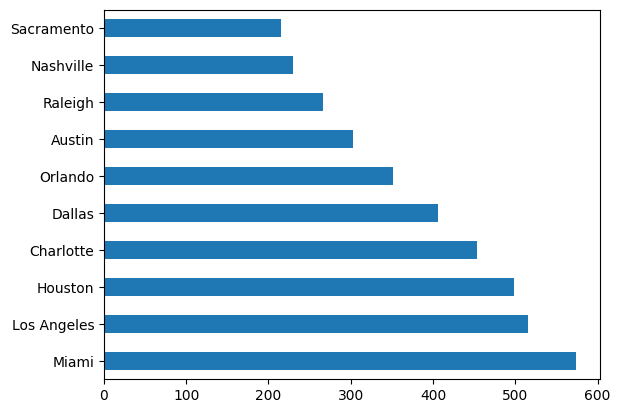

In [ ]:
cities_by_accident[:10].plot(kind = 'barh')

**Clearly, from above plot we can say that Miami is the city with highest number of road accidents in US.**

<Axes: xlabel='City', ylabel='Count'>

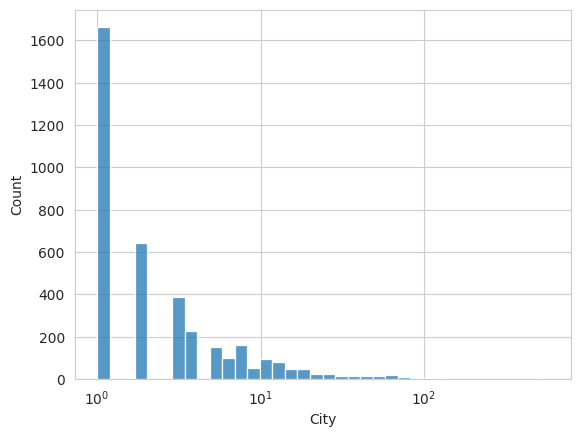

In [ ]:
sns.set_style("whitegrid")
sns.histplot(cities_by_accident, log_scale=True)

In [ ]:
cities_by_accident[cities_by_accident == 1]

Davidsonville    1
Burkeville       1
Binghamton       1
Clearlake        1
Walterville      1
                ..
Lacey            1
Hamtramck        1
Alum Bank        1
Lyndhurst        1
Orient           1
Name: City, Length: 1663, dtype: int64

##PROVIDING COUNT OF ACCIDENTS FOR EACH STATE IN THE DATASET, ALLOWING EASY ANALYSIS OF ACCIDENT DISTRIBUTION ACROSS DIFFERENT STATES.

In [ ]:
states_by_accident = df.State .value_counts()
states_by_accident

CA    5504
FL    2699
TX    1790
SC    1192
NC    1047
NY    1044
PA     935
VA     911
MN     614
OR     549
AZ     542
GA     539
IL     525
TN     521
MI     509
LA     444
MD     436
NJ     412
WA     362
OH     352
AL     309
UT     304
CO     272
MO     251
OK     225
MA     216
CT     200
IN     188
WI     114
NE     106
KY      94
MT      88
AR      82
IA      79
NV      67
KS      66
RI      63
DC      51
WV      40
MS      40
ID      38
NM      35
NH      33
DE      32
ME      16
WY      13
ND      10
VT       6
Name: State, dtype: int64

##PLOTTING ALL THE STATES BY NUMBER OF ACCIDENTS.

<Axes: >

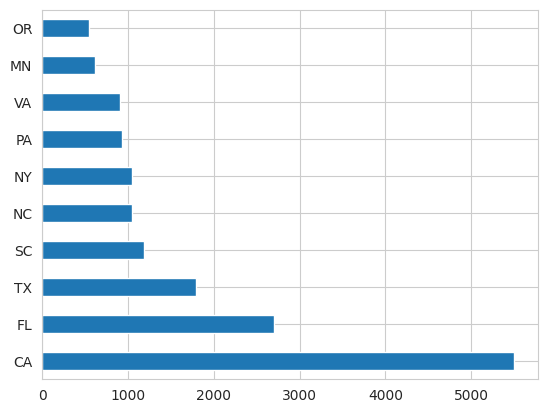

In [ ]:
states_by_accident[:10]
States_list = ['CA', 'FL', 'TX', 'SC', 'NY', 'NC', 'VA', 'PA', 'MN', 'OR']
states_by_accident[:10].plot(kind = 'barh')

**Clearly, from above plot we can say that CA is the State with highest number of road accidents in US.**

Hence, California is the state with highest number of accidents followed by Florida and Texas.

<Axes: xlabel='State', ylabel='Count'>

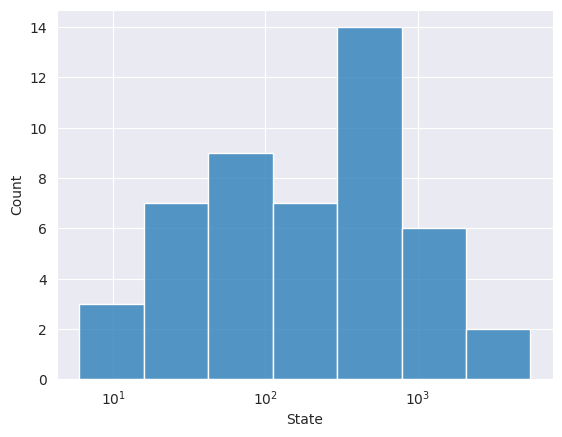

In [ ]:
sns.set_style("darkgrid")
sns.histplot(states_by_accident, log_scale=True)

In [ ]:
states_by_accident[states_by_accident <= 1000]

PA    935
VA    911
MN    614
OR    549
AZ    542
GA    539
IL    525
TN    521
MI    509
LA    444
MD    436
NJ    412
WA    362
OH    352
AL    309
UT    304
CO    272
MO    251
OK    225
MA    216
CT    200
IN    188
WI    114
NE    106
KY     94
MT     88
AR     82
IA     79
NV     67
KS     66
RI     63
DC     51
WV     40
MS     40
ID     38
NM     35
NH     33
DE     32
ME     16
WY     13
ND     10
VT      6
Name: State, dtype: int64

##START_TIME COLUMN ANALYSIS

In [ ]:
df.Start_Time

0                  2019-06-12 10:10:56
1        2022-12-03 23:37:14.000000000
2        2022-08-20 13:13:00.000000000
3                  2022-02-21 17:43:04
4                  2020-12-04 01:46:00
                     ...              
23960              2020-09-09 06:02:07
23961              2016-06-18 11:19:21
23962              2022-10-06 17:20:12
23963              2017-11-18 11:22:45
23964              2022-06-25 05:26:30
Name: Start_Time, Length: 23965, dtype: object

In [ ]:
df.Start_Time = pd.to_datetime(df.Start_Time)

<Axes: xlabel='Start_Time', ylabel='Density'>

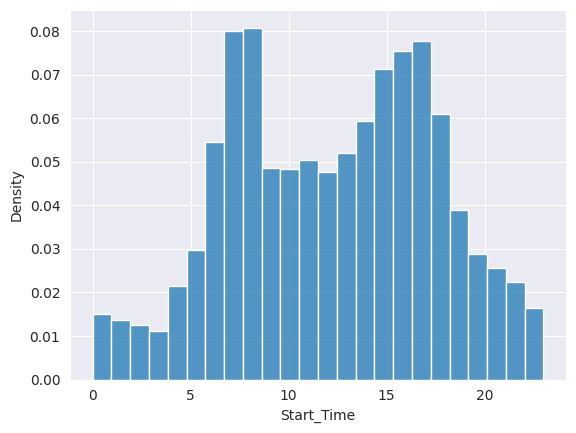

In [ ]:
sns.histplot(df.Start_Time.dt.hour, bins=24, kde=False, stat="density")

<Axes: xlabel='Start_Time', ylabel='Density'>

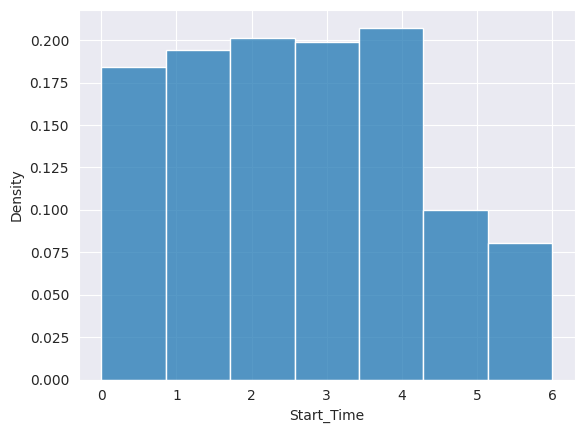

In [ ]:
sns.histplot(df.Start_Time.dt.dayofweek, bins=7, kde=False, stat="density")

<Axes: xlabel='Start_Time', ylabel='Density'>

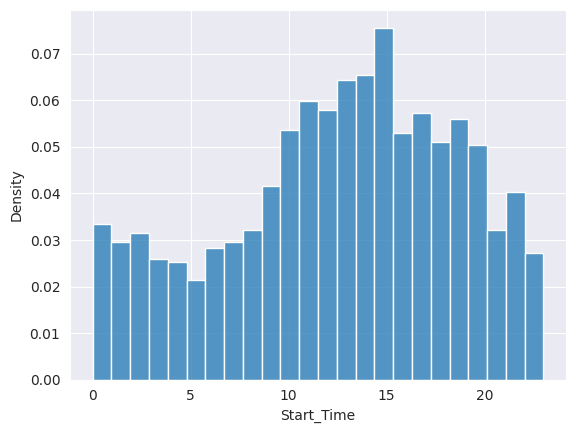

In [ ]:
sundays_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 6]
sns.histplot(sundays_start_time.dt.hour, bins=24, stat='density')

<Axes: xlabel='Start_Time', ylabel='Density'>

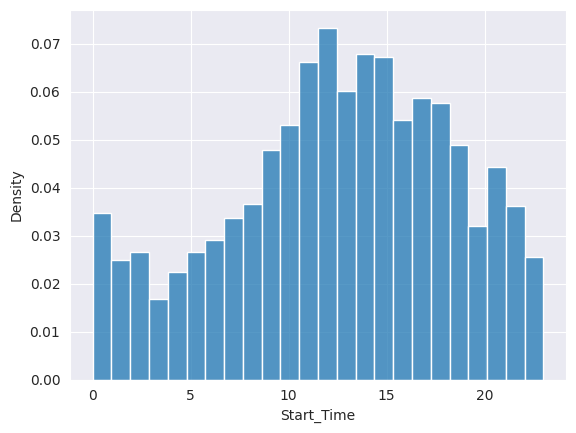

In [ ]:
saturdays_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 5]
sns.histplot(saturdays_start_time.dt.hour, bins=24, stat='density')

<Axes: xlabel='Start_Time', ylabel='Density'>

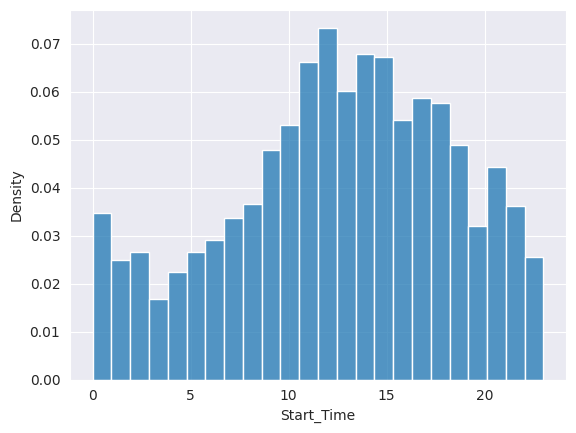

In [ ]:
saturdays_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 5]
sns.histplot(saturdays_start_time.dt.hour, bins=24, stat='density')

<Axes: xlabel='Start_Time', ylabel='Density'>

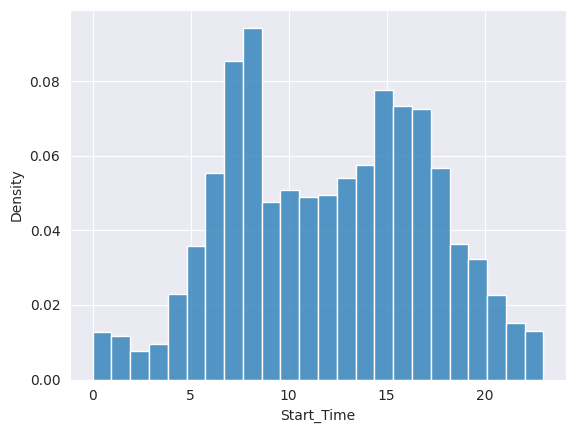

In [ ]:
mondays_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 0]
sns.histplot(mondays_start_time.dt.hour, bins=24, stat='density')

<Axes: xlabel='Start_Time', ylabel='Density'>

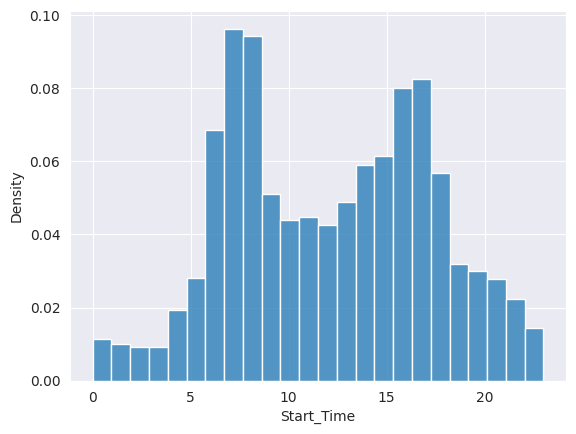

In [ ]:
wednesdays_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 2]
sns.histplot(wednesdays_start_time.dt.hour, bins=24, stat='density')

<Axes: xlabel='Start_Time', ylabel='Density'>

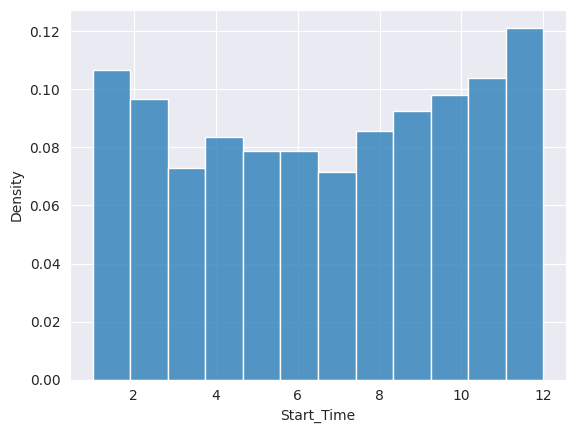

In [ ]:
sns.histplot(df.Start_Time.dt.month, bins=12, stat='density')

<Axes: xlabel='Start_Time', ylabel='Density'>

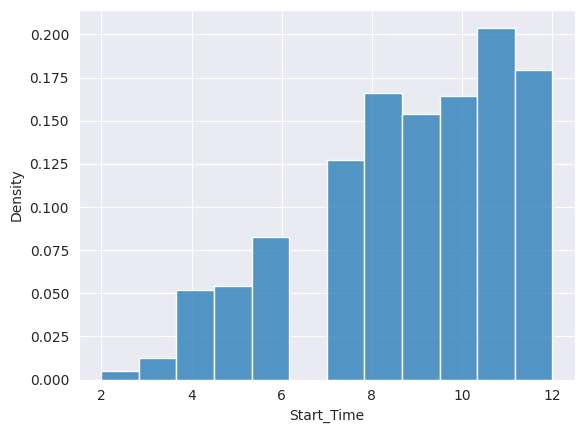

In [ ]:
df_particular_year = df[df.Start_Time.dt.year == 2016]
sns.histplot(df_particular_year.Start_Time.dt.month, bins=12, stat='density')

<Axes: xlabel='Start_Time', ylabel='Density'>

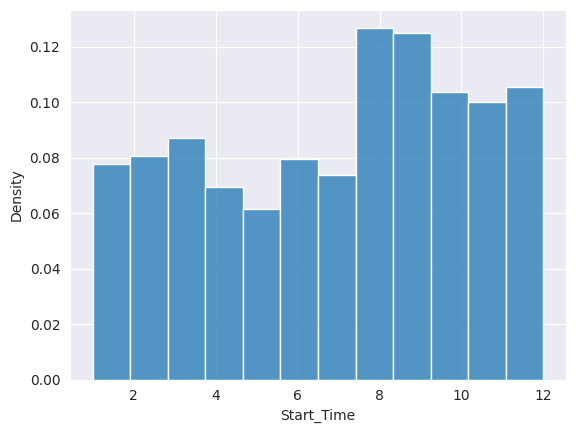

In [ ]:
df_particular_year = df[df.Start_Time.dt.year == 2017]
sns.histplot(df_particular_year.Start_Time.dt.month, bins=12, stat='density')

<Axes: xlabel='Start_Time', ylabel='Density'>

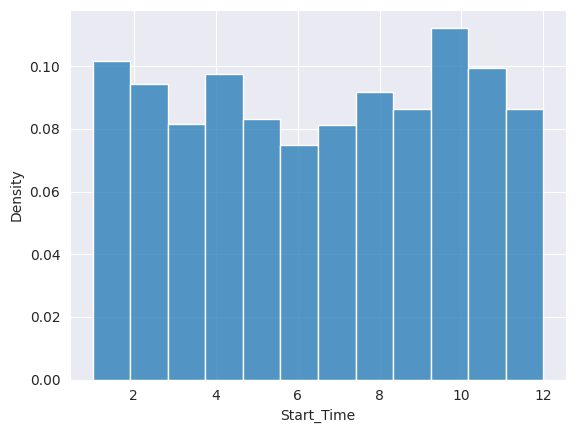

In [ ]:
df_particular_year = df[df.Start_Time.dt.year == 2018]
sns.histplot(df_particular_year.Start_Time.dt.month, bins=12, stat='density')

<Axes: xlabel='Start_Time', ylabel='Density'>

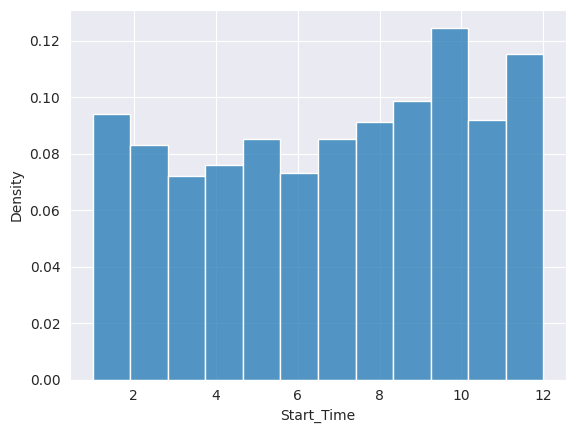

In [ ]:
df_particular_year = df[df.Start_Time.dt.year == 2019]
sns.histplot(df_particular_year.Start_Time.dt.month, bins=12, stat='density')

<Axes: xlabel='Start_Time', ylabel='Density'>

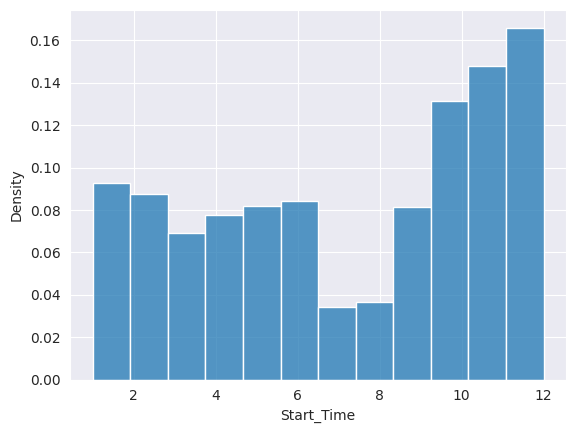

In [ ]:
df_particular_year = df[df.Start_Time.dt.year == 2020]
sns.histplot(df_particular_year.Start_Time.dt.month, bins=12, stat='density')

##START_LAT AND START_LNG COLUMN ANALYSIS

In [ ]:
df.Start_Lat

0        30.641211
1        38.990562
2        34.661189
3        43.680592
4        35.395484
           ...    
23960    33.919376
23961    37.797668
23962    28.385298
23963    30.578346
23964    42.146900
Name: Start_Lat, Length: 23965, dtype: float64

In [ ]:
df.Start_Lng

0        -91.153481
1        -77.399070
2       -120.492822
3        -92.993317
4       -118.985176
            ...    
23960    -84.357933
23961   -121.143166
23962    -81.244348
23963    -84.699806
23964    -87.879224
Name: Start_Lng, Length: 23965, dtype: float64

##VISUALIZING THE GEOGRAPHIC DISTRIBUTION OF ACCIDENT DATA.

<Axes: xlabel='Start_Lng', ylabel='Start_Lat'>

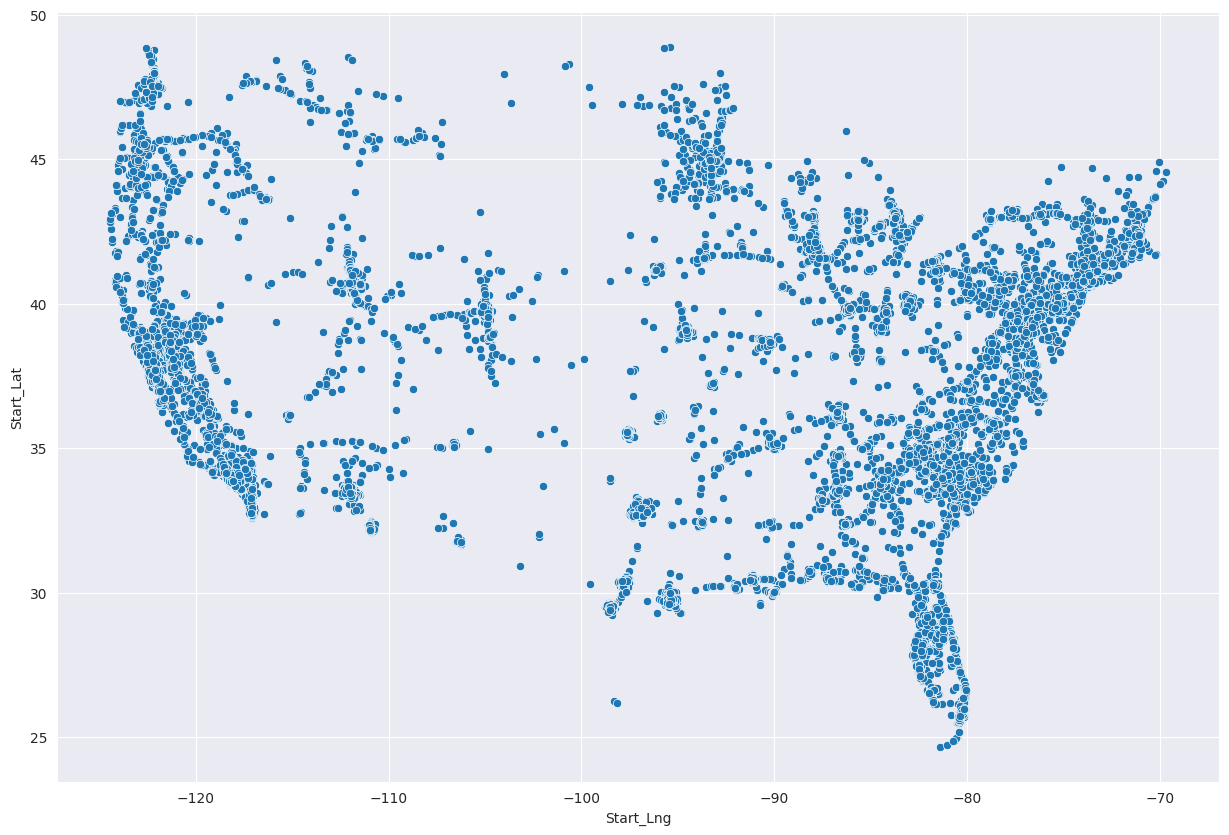

In [ ]:
plt.figure(figsize=(15,10))
sns.scatterplot(y=df.Start_Lat, x=df.Start_Lng)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23965 entries, 0 to 23964
Data columns (total 46 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     23965 non-null  object        
 1   Source                 23965 non-null  object        
 2   Severity               23965 non-null  int64         
 3   Start_Time             23965 non-null  datetime64[ns]
 4   End_Time               23965 non-null  object        
 5   Start_Lat              23965 non-null  float64       
 6   Start_Lng              23965 non-null  float64       
 7   End_Lat                13219 non-null  float64       
 8   End_Lng                13219 non-null  float64       
 9   Distance(mi)           23965 non-null  float64       
 10  Description            23965 non-null  object        
 11  Street                 23935 non-null  object        
 12  City                   23965 non-null  object        
 13  C

<Axes: xlabel='Start_Lng', ylabel='Start_Lat'>

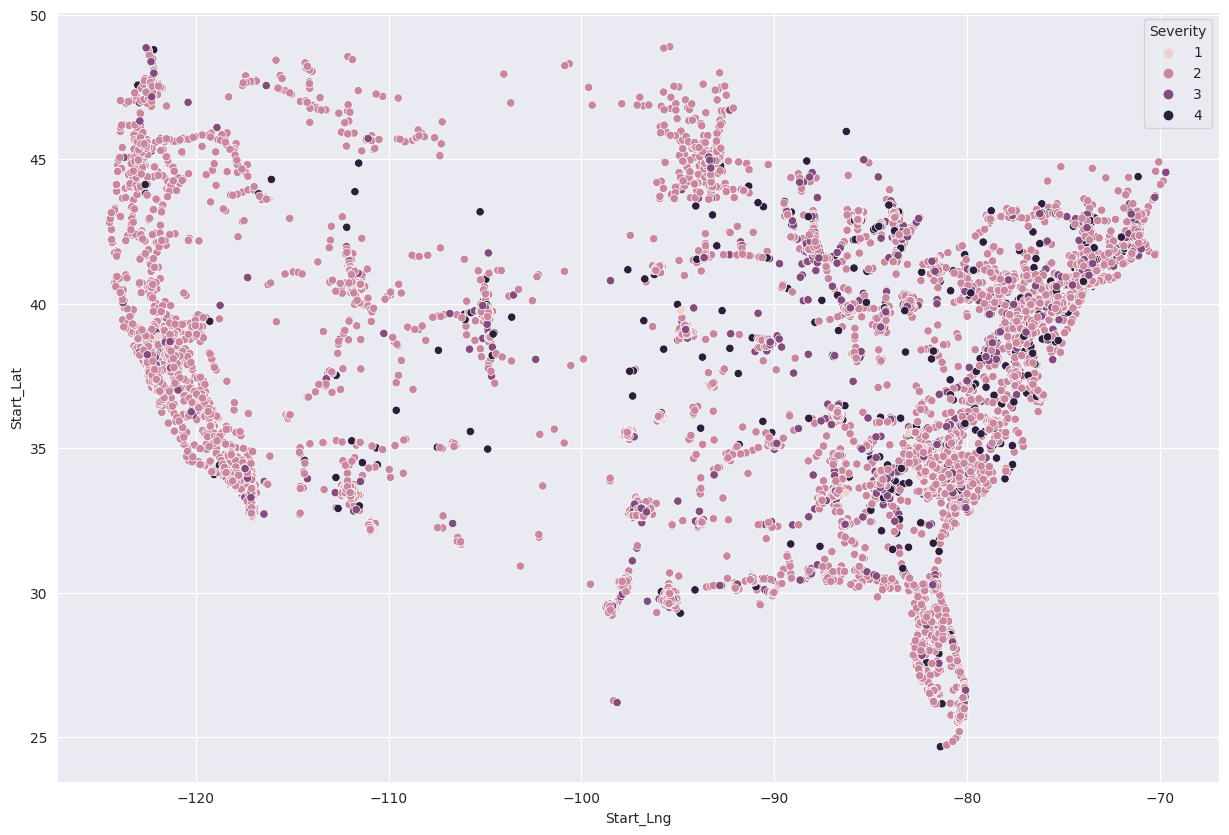

In [ ]:
plt.figure(figsize=(15,10))
sns.scatterplot(y=df.Start_Lat, x=df.Start_Lng, hue=df.Severity)

<Axes: xlabel='Start_Lng', ylabel='Start_Lat'>

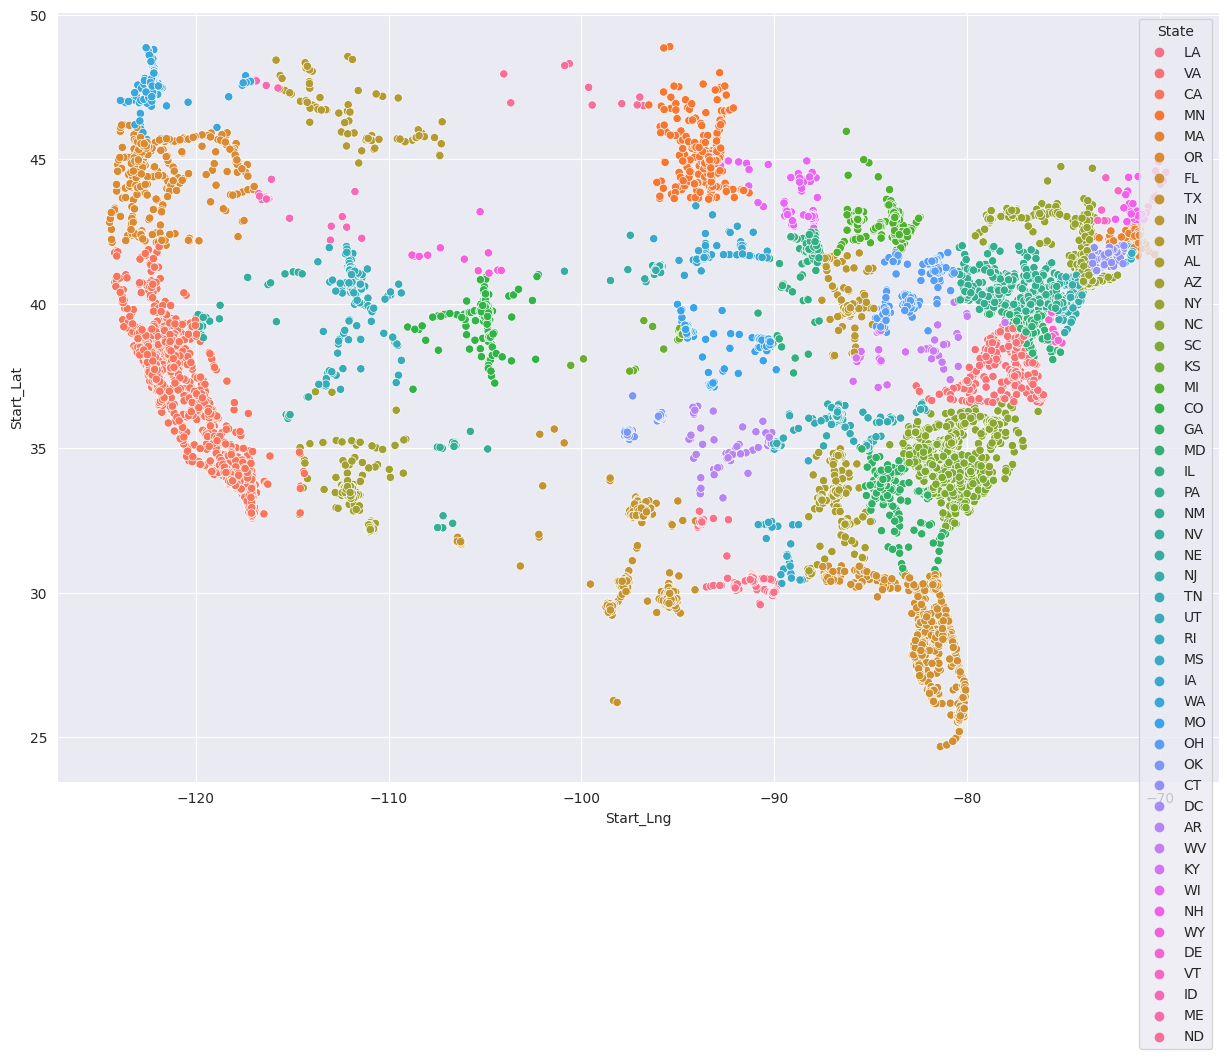

In [ ]:
plt.figure(figsize=(15,10))
sns.scatterplot(y=df.Start_Lat, x=df.Start_Lng, hue=df.State)

In [ ]:
df.State.value_counts()[:25]

CA    5504
FL    2699
TX    1790
SC    1192
NC    1047
NY    1044
PA     935
VA     911
MN     614
OR     549
AZ     542
GA     539
IL     525
TN     521
MI     509
LA     444
MD     436
NJ     412
WA     362
OH     352
AL     309
UT     304
CO     272
MO     251
OK     225
Name: State, dtype: int64

##PIE CHART FOR VISUALIZING ACCIDENT COUNT PERCENTAGE ACROSS STATES.

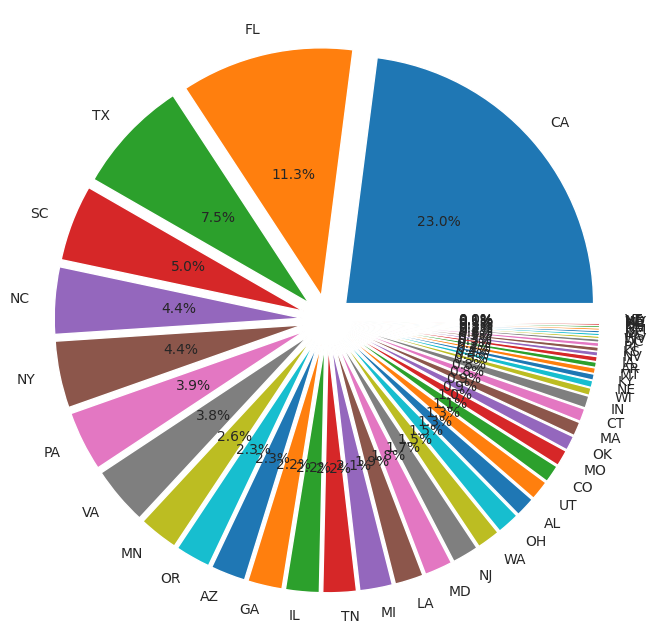

In [ ]:
pie, ax = plt.subplots(figsize=[8,15])
labels = df.State.value_counts().keys()
plt.pie(x=df.State.value_counts(), autopct="%.1f%%", explode=[0.1]*len(df.State.value_counts()), labels=labels, pctdistance=0.5)
plt.show();

**CA i.e California is the State with highest number of accidents in US.(23.0% as seen in above piechart)**

##DISTRIBUTION OF ACCIDENTS ACROSS STATES BASED ON THEIR SEVERITY LEVELS (1 TO 4).

<ipython-input-60-19995cbda5cb>:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot2grid((2,2),(0,0))


Text(0.5, 1.0, 'Most Severe Accidents: Severity=4')

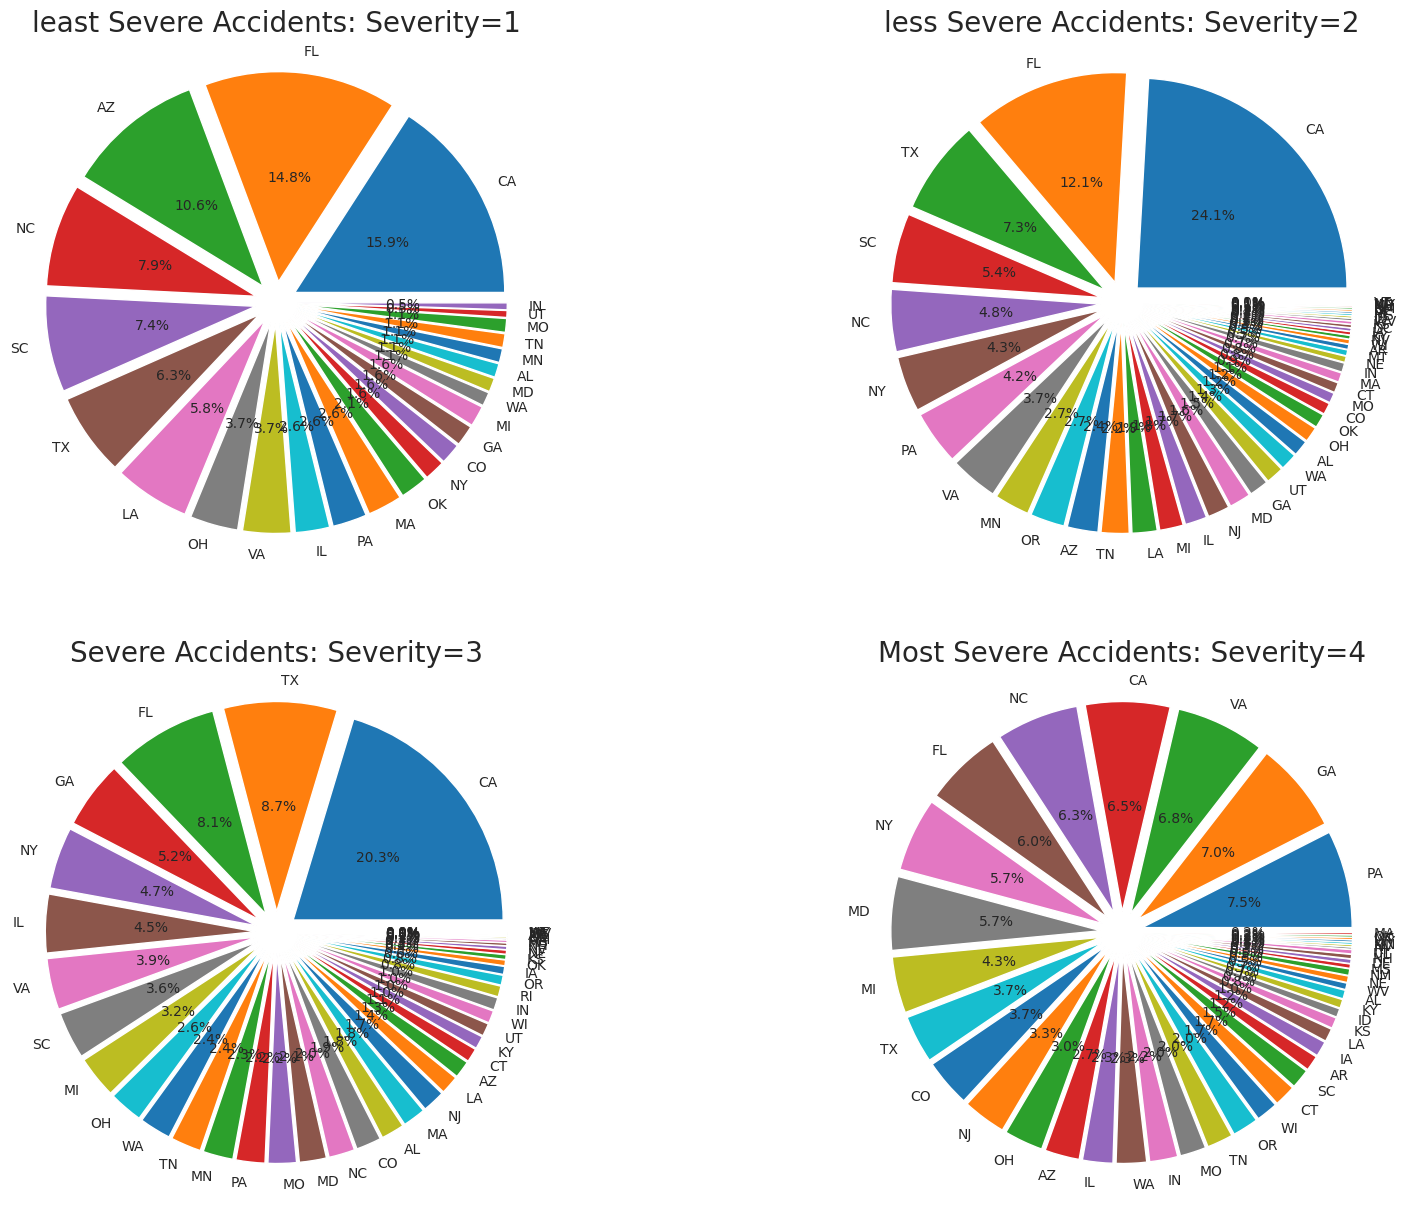

In [ ]:
# Segregating accidents on the basis of severity
severe_accidents_4 = df[df.Severity==4].State.value_counts()
severe_accidents_3 = df[df.Severity==3].State.value_counts()
severe_accidents_2 = df[df.Severity==2].State.value_counts()
severe_accidents_1 = df[df.Severity==1].State.value_counts()
fig, ax1 = plt.subplots(figsize=[20,15])
ax1 = plt.subplot2grid((2,2),(0,0))
labels = severe_accidents_1.keys()
plt.pie(x=severe_accidents_1, autopct="%.1f%%", explode=[0.1]*len(severe_accidents_1), labels=labels, pctdistance=0.5)
plt.title("least Severe Accidents: Severity=1", fontsize=20)

ax1 = plt.subplot2grid((2,2),(0,1))
labels = severe_accidents_2.keys()
plt.pie(x=severe_accidents_2, autopct="%.1f%%", explode=[0.1]*len(severe_accidents_2), labels=labels, pctdistance=0.5)
plt.title("less Severe Accidents: Severity=2", fontsize=20)

ax1 = plt.subplot2grid((2,2),(1,0))
labels = severe_accidents_3.keys()
plt.pie(x=severe_accidents_3, autopct="%.1f%%", explode=[0.1]*len(severe_accidents_3), labels=labels, pctdistance=0.5)
plt.title("Severe Accidents: Severity=3", fontsize=20)

ax1 = plt.subplot2grid((2,2),(1,1))
labels = severe_accidents_4.keys()
plt.pie(x=severe_accidents_4, autopct="%.1f%%", explode=[0.1]*len(severe_accidents_4), labels=labels, pctdistance=0.5)
plt.title("Most Severe Accidents: Severity=4", fontsize=20)

##VISIBILITY(MI) COLUMN ANALYSIS

In [ ]:
df['Visibility(mi)']

0        10.0
1        10.0
2        10.0
3        10.0
4        10.0
         ... 
23960    10.0
23961    10.0
23962    10.0
23963    10.0
23964    10.0
Name: Visibility(mi), Length: 23965, dtype: float64

In [ ]:
df['Visibility(mi)'].value_counts()

10.00     18709
7.00        707
9.00        603
8.00        477
5.00        448
2.00        435
6.00        395
4.00        379
3.00        359
1.00        298
0.50        118
0.25         84
0.75         65
2.50         58
1.50         43
0.20         38
13.00        34
0.00         32
1.80         29
0.80         28
15.00        24
20.00        16
1.20         15
50.00        10
30.00         9
0.12          5
40.00         4
0.38          4
25.00         2
80.00         2
45.00         2
70.00         1
12.00         1
0.06          1
120.00        1
0.10          1
Name: Visibility(mi), dtype: int64

##VISIBILITY AND SEVERITY IMPACT ANALYSIS

In [ ]:
# data when severity is high and visibility is moderate
df[(df.Severity == 4) & (df['Visibility(mi)'] <=10)]

ID   Source  Severity          Start_Time  \
91     A-7674438  Source1         4 2017-10-23 01:09:23   
152    A-7490180  Source1         4 2018-12-25 20:32:30   
165    A-1855153  Source2         4 2019-09-30 12:42:56   
175    A-7253427  Source1         4 2020-02-07 10:05:24   
197    A-3566804  Source1         4 2017-02-14 01:08:32   
...          ...      ...       ...                 ...   
23742  A-7755270  Source1         4 2019-07-07 23:10:50   
23861  A-4989146  Source1         4 2022-07-19 17:31:21   
23867  A-7157658  Source1         4 2020-04-06 18:42:14   
23951  A-3926128  Source1         4 2022-05-03 19:07:16   
23958  A-7082807  Source1         4 2020-06-12 20:42:48   

                            End_Time  Start_Lat   Start_Lng    End_Lat  \
91               2017-10-23 07:09:23  40.861739  -73.804528  40.864590   
152              2018-12-25 21:01:53  39.139480  -76.615400  39.139850   
165              2019-09-30 14:04:24  40.407188 -104.992989        NaN   
175              2020-02-07 10:34:51  25.788340  -80.208310  25.788570   
197              2017-02-14 08:05:49  30.036789  -95.851984  30.065380   
...                              ...        ...         ...        ...   
23742            2019-07-07 23:40:16  38.874540  -77.046390  38.872230   
23861            2022-07-19 19:40:29  38.950502 -104.584420  38.946480   
23867            2020-04-06 19:11:33  40.767290  -73.904110  40.768570   
23951  2022-05-03 20:41:42.000000000  40.771004  -73.953642  40.772004   
23958            2020-06-13 01:59:18  39.762670  -83.223920  39.748430   

          End_Lng  Distance(mi)  ... Roundabout Station   Stop  \
91     -73.813720         0.519  ...      False   False  False   
152    -76.621930         0.351  ...      False   False  False   
165           NaN         3.250  ...      False   False  False   
175    -80.207270         0.067  ...      False   False  False   
197    -95.913800         4.192  ...      False   False  False   
...           ...           ...  ...        ...     ...    ...   
23742  -77.045730         0.164  ...      False   False  False   
23861 -104.589843         0.403  ...      False   False  False   
23867  -73.905970         0.132  ...      False   False  False   
23951  -73.956002         0.142  ...      False    True  False   
23958  -83.238430         1.250  ...      False   False  False   

      Traffic_Calming Traffic_Signal Turning_Loop Sunrise_Sunset  \
91              False          False        False          Night   
152             False          False        False          Night   
165             False          False        False            Day   
175             False          False        False            Day   
197             False          False        False          Night   
...               ...            ...          ...            ...   
23742           False          False        False          Night   
23861           False          False        False            Day   
23867           False          False        False            Day   
23951           False           True        False            Day   
23958           False          False        False            Day   

      Civil_Twilight Nautical_Twilight Astronomical_Twilight  
91             Night             Night                 Night  
152            Night             Night                 Night  
165              Day               Day                   Day  
175              Day               Day                   Day  
197            Night             Night                 Night  
...              ...               ...                   ...  
23742          Night             Night                 Night  
23861            Day               Day                   Day  
23867            Day               Day                   Day  
23951            Day               Day                   Day  
23958            Day               Day                   Day  

[576 rows x 46 columns]

In [ ]:
# total percentage of accidents in which visibility was less than 2 miles
(len(df[df['Visibility(mi)'] <=2]) / len(df) )* 100

4.99061130815773

In [ ]:
#total percentage of accidents in which visibility was 2 or less and severity was 4
(len(df[(df['Visibility(mi)'] <= 2) & (df['Severity'] == 4)]) / len(df)) * 100

0.1293553098268308

##WEATHER COLUMN ANALYSIS

In [ ]:
# Kind of weather when no. of accidents were greater than 1000
weather = df.Weather_Condition.value_counts()
weather[weather > 1000]

Fair             7857
Mostly Cloudy    3106
Cloudy           2565
Clear            2493
Partly Cloudy    2154
Overcast         1218
Light Rain       1133
Name: Weather_Condition, dtype: int64

##PIE CHART FOR WEATHER

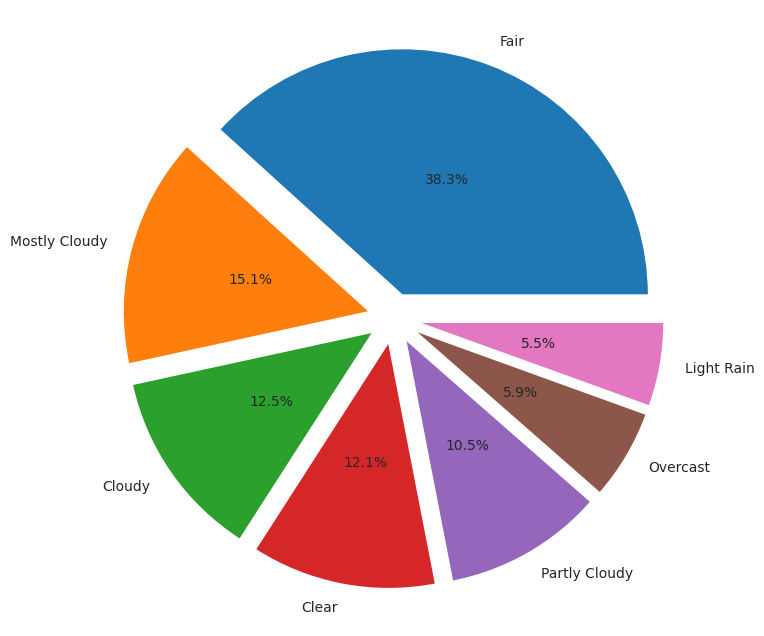

In [ ]:
pie, ax = plt.subplots(figsize=[10,8])
labels = weather[weather > 1000].keys()
plt.pie(x=weather[weather > 1000], autopct="%.1f%%", explode=[0.1]*len(weather[weather > 1000]), labels=labels, pctdistance=0.5)
plt.show();

##TEMPERATURE COLUMN ANALYSIS

In [ ]:
df['Temperature(F)']
df['Temperature(F)'].value_counts()

73.0    553
77.0    528
75.0    521
64.0    520
70.0    517
       ... 
48.4      1
87.4      1
63.1      1
26.4      1
78.4      1
Name: Temperature(F), Length: 434, dtype: int64

##SCATTERPLOT FOR TEMPERATURE

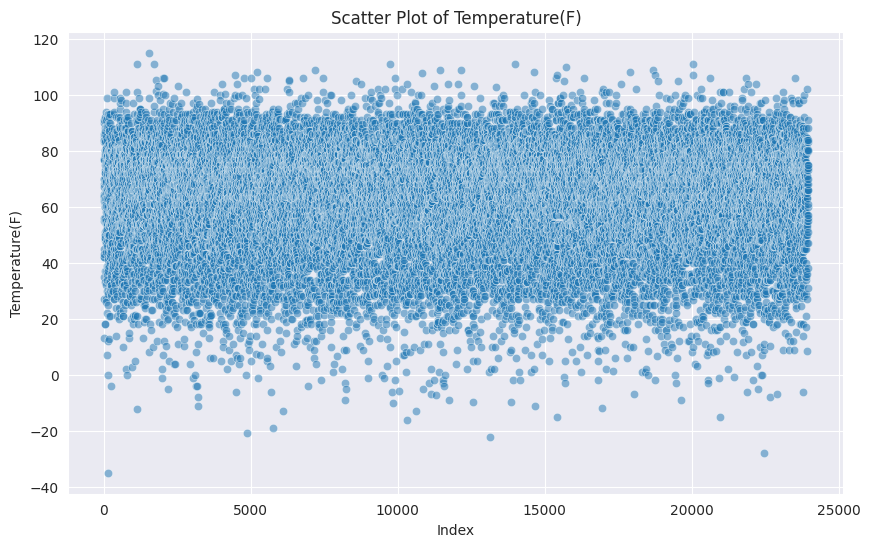

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df.index, y='Temperature(F)', data=df, alpha=0.5)
plt.title('Scatter Plot of Temperature(F)')
plt.xlabel('Index')
plt.ylabel('Temperature(F)')
plt.show()

##SUNRISE_SUNSET COLUMN ANALYSIS

In [ ]:
df.Sunrise_Sunset.value_counts()

Day      16592
Night     7304
Name: Sunrise_Sunset, dtype: int64

##PIECHART FOR DAY/NIGHT DISTRIBUTION OF ACCIDENTS

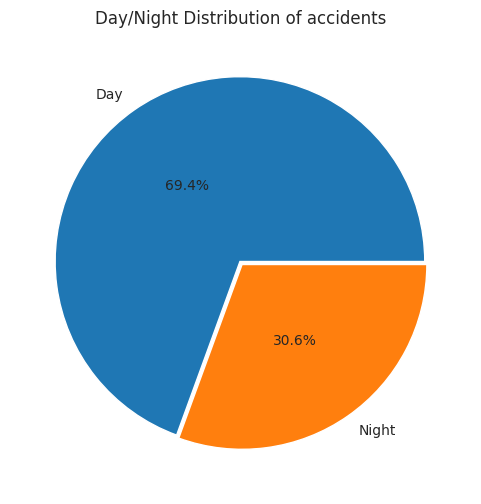

In [ ]:
pie, ax = plt.subplots(figsize=[6,6])
labels = df.Sunrise_Sunset.value_counts().keys()
plt.pie(x=df.Sunrise_Sunset.value_counts(), autopct="%.1f%%", explode=[0.01]*len(df.Sunrise_Sunset.value_counts()), labels=labels, pctdistance=0.5)
plt.title("Day/Night Distribution of accidents")
plt.show();

##NO_EXIT COLUMN ANALYSIS

In [ ]:
no_exit = df.No_Exit.groupby(df.Severity).value_counts()
no_exit

Severity  No_Exit
1         False        189
2         False      19035
          True          55
3         False       4078
          True           7
4         False        599
          True           1
Name: No_Exit, dtype: int64

##AMENITY COLUMN ANALYSIS

In [ ]:
amenity = df.Amenity.groupby(df.Severity).value_counts()
amenity

Severity  Amenity
1         False        187
          True           2
2         False      18816
          True         274
3         False       4068
          True          17
4         False        593
          True           7
Name: Amenity, dtype: int64

In [ ]:
amenity.index

MultiIndex([(1, False),
            (1,  True),
            (2, False),
            (2,  True),
            (3, False),
            (3,  True),
            (4, False),
            (4,  True)],
           names=['Severity', 'Amenity'])

##RAILWAY COLUMN ANALYSIS

In [ ]:
railway = df.Railway.groupby(df.Severity).value_counts()
railway

Severity  Railway
1         False        187
          True           2
2         False      18923
          True         167
3         False       4057
          True          28
4         False        595
          True           5
Name: Railway, dtype: int64

##TRAFFIC_CALMING COLUMN ANALYSIS

In [ ]:
traffic_calming = df.Traffic_Calming.groupby(df.Severity).value_counts()
traffic_calming

Severity  Traffic_Calming
1         False                189
2         False              19073
          True                  17
3         False               4082
          True                   3
4         False                600
Name: Traffic_Calming, dtype: int64

##STOP COLUMN ANALYSIS

In [ ]:
stop = df.Stop.groupby(df.Severity).value_counts()
stop

Severity  Stop 
1         False      183
          True         6
2         False    18445
          True       645
3         False     4063
          True        22
4         False      585
          True        15
Name: Stop, dtype: int64

##TRAFFIC_SIGNAL COLUMN ANALYSIS

In [ ]:
traffic_signal = df.Traffic_Signal.groupby(df.Severity).value_counts()
traffic_signal

Severity  Traffic_Signal
1         False               116
          True                 73
2         False             16013
          True               3077
3         False              3794
          True                291
4         False               542
          True                 58
Name: Traffic_Signal, dtype: int64

##GIVE_WAY COLUMN ANALYSIS

In [ ]:
give_way = df.Give_Way.groupby(df.Severity).value_counts()
give_way

Severity  Give_Way
1         False         189
2         False       18994
          True           96
3         False        4070
          True           15
4         False         600
Name: Give_Way, dtype: int64

##BUMP COLUMN ANALYSIS

In [ ]:
bump = df.Bump.groupby(df.Severity).value_counts()
bump

Severity  Bump 
1         False      189
2         False    19083
          True         7
3         False     4083
          True         2
4         False      600
Name: Bump, dtype: int64

##CROSSING COLUMN ANALYSIS

In [ ]:
crossing = df.Crossing.groupby(df.Severity).value_counts()
crossing

Severity  Crossing
1         False         139
          True           50
2         False       16665
          True         2425
3         False        3927
          True          158
4         False         555
          True           45
Name: Crossing, dtype: int64

##TURNING_LOOP COLUMN ANALYSIS

In [ ]:
df.Turning_Loop.value_counts()

False    23964
Name: Turning_Loop, dtype: int64

##JUNCTION COLUMN ANALYSIS

In [ ]:
df.Junction.value_counts()

False    22151
True      1813
Name: Junction, dtype: int64

In [ ]:
Junction = df.Junction.groupby(df.Severity).value_counts()
Junction

Severity  Junction
1         False         180
          True            9
2         False       17761
          True         1329
3         False        3669
          True          416
4         False         541
          True           59
Name: Junction, dtype: int64

##ROAD CONDITION ANALYSIS

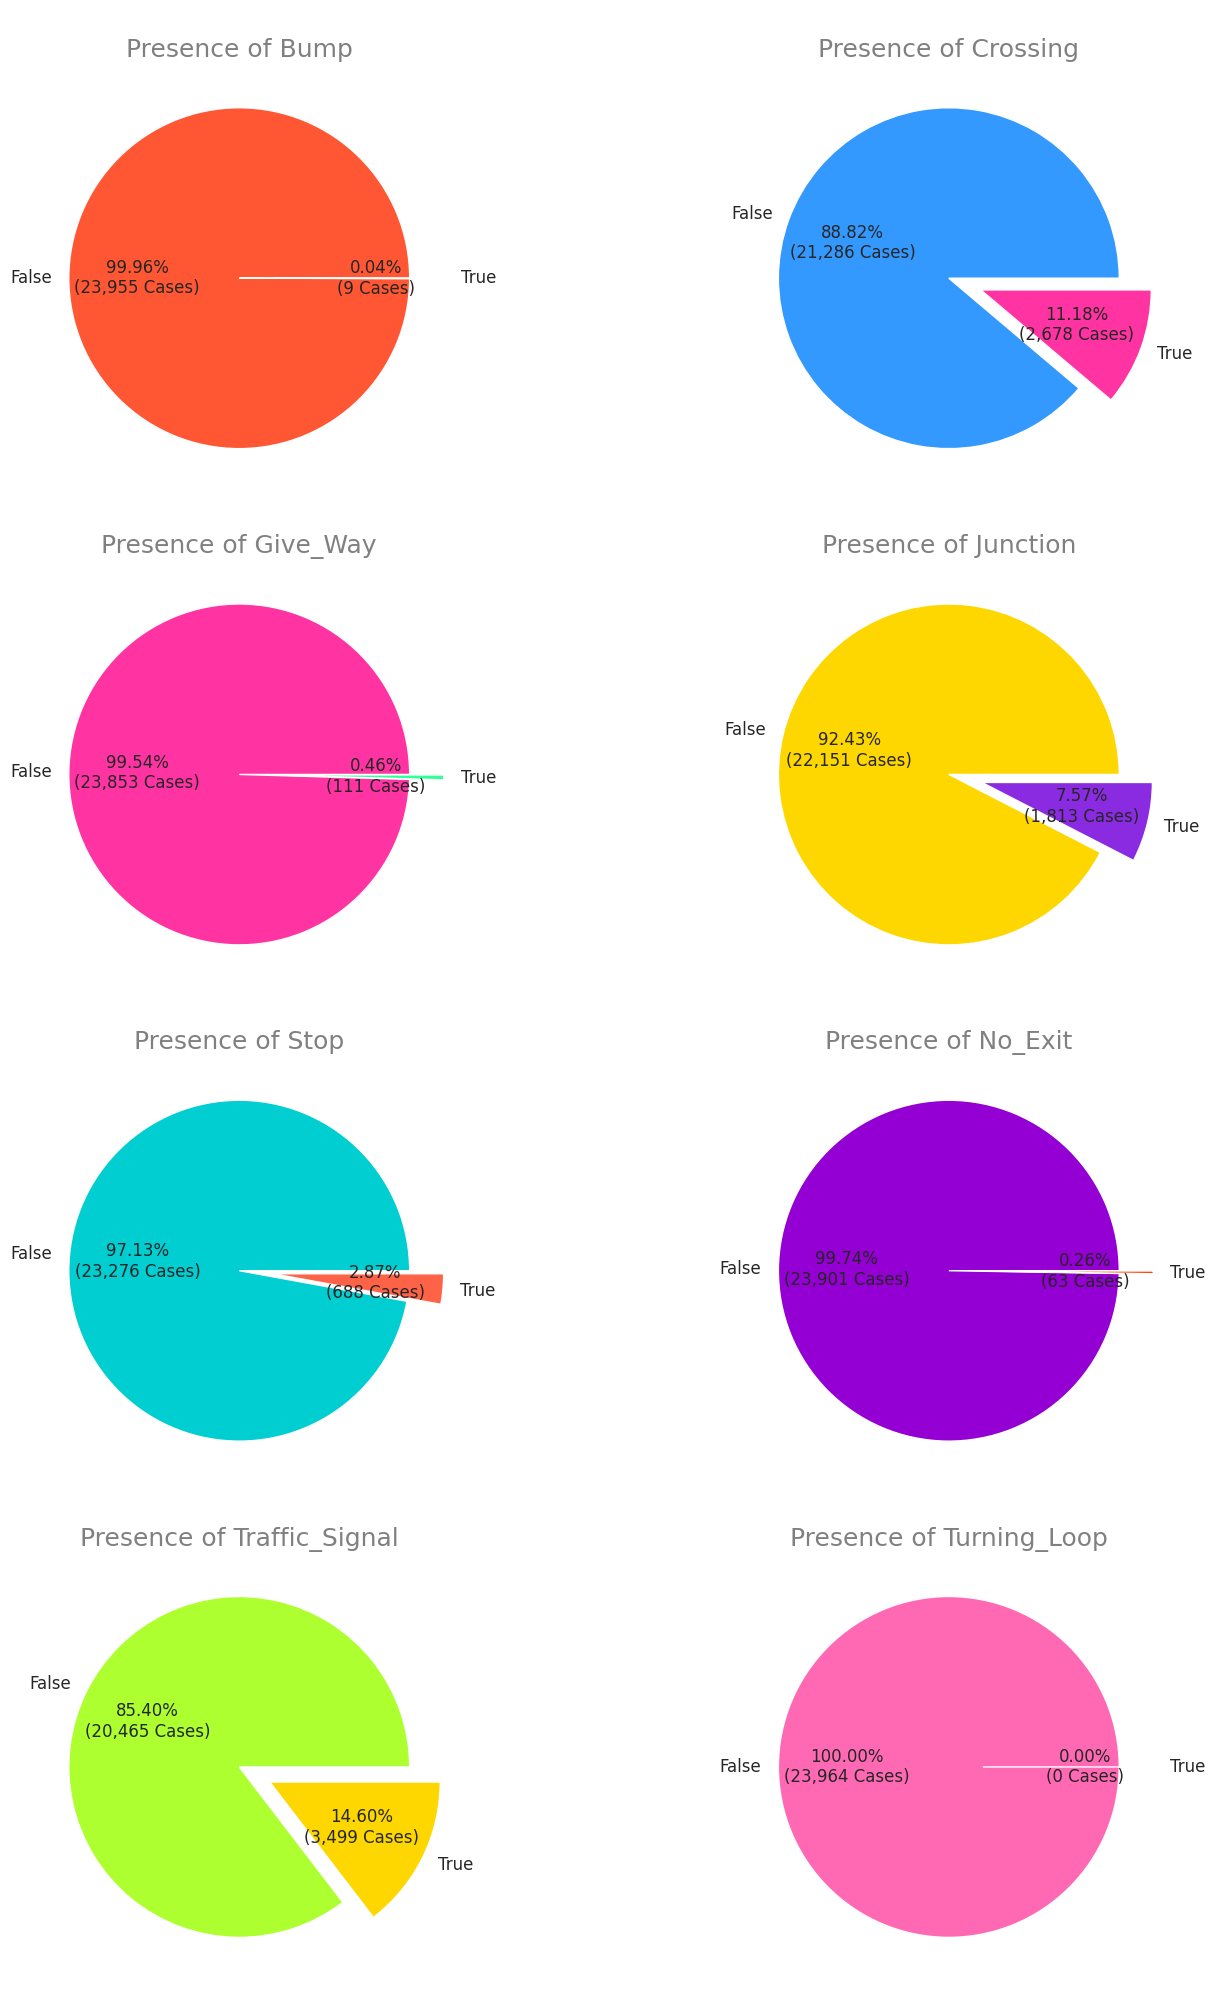

In [ ]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(nrows=4, ncols=2, figsize=(16, 20))

road_conditions = ['Bump', 'Crossing', 'Give_Way', 'Junction', 'Stop', 'No_Exit', 'Traffic_Signal', 'Turning_Loop']
colors = [('#FF5733', '#33FF57'), ('#3399FF', '#FF33A1'), ('#FF33A1', '#33FF99'), ('#FFD700', '#8A2BE2'),
          ('#00CED1', '#FF6347'), ('#9400D3', '#FF4500'), ('#ADFF2F', '#FFD700'), ('#FF69B4', '#00FFFF')]

count = 0

def func(pct, allvals):
    absolute = int(round(pct/100*np.sum(allvals), 2))
    return "{:.2f}%\n({:,d} Cases)".format(pct, absolute)

for i in [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]:
    size = list(df[road_conditions[count]].value_counts())
    if len(size) != 2:
        size.append(0)

    labels = ['False', 'True']

    i.pie(size, labels=labels, colors=colors[count],
          autopct=lambda pct: func(pct, size), labeldistance=1.1,
          textprops={'fontsize': 12}, explode=[0, 0.2])

    title = '\nPresence of {}'.format(road_conditions[count])

    i.set_title(title, fontsize=18, color='grey')

    count += 1

plt.tight_layout()
plt.show()


###INSIGHTS FROM ABOVE PLOTS:-

**1.Almost in every case (99.96%) Bumper was absent in the accident spot.**

**2.In 11.18% cases, road accidents happened near the crossing.**

**3.In 99.54% cases. there was no give way near accident area.**

**4.Around 7.57% road accident cases recorded near the junctions.**

**5.In 97.13% cases, there were no Stop near the accident area.**

**6.In 99.74% cases, there was no exit near accident area.**

**7.Around 14.60% road accident cases were recorded near the traffic signal.**

**8.There are no accident cases recorded near the Turning Loop.**

##BARPLOTS OF ALL COLUMNS FOR ROAD CONDITION ANALYSIS

<Axes: title={'center': 'Railway'}, xlabel='Severity'>

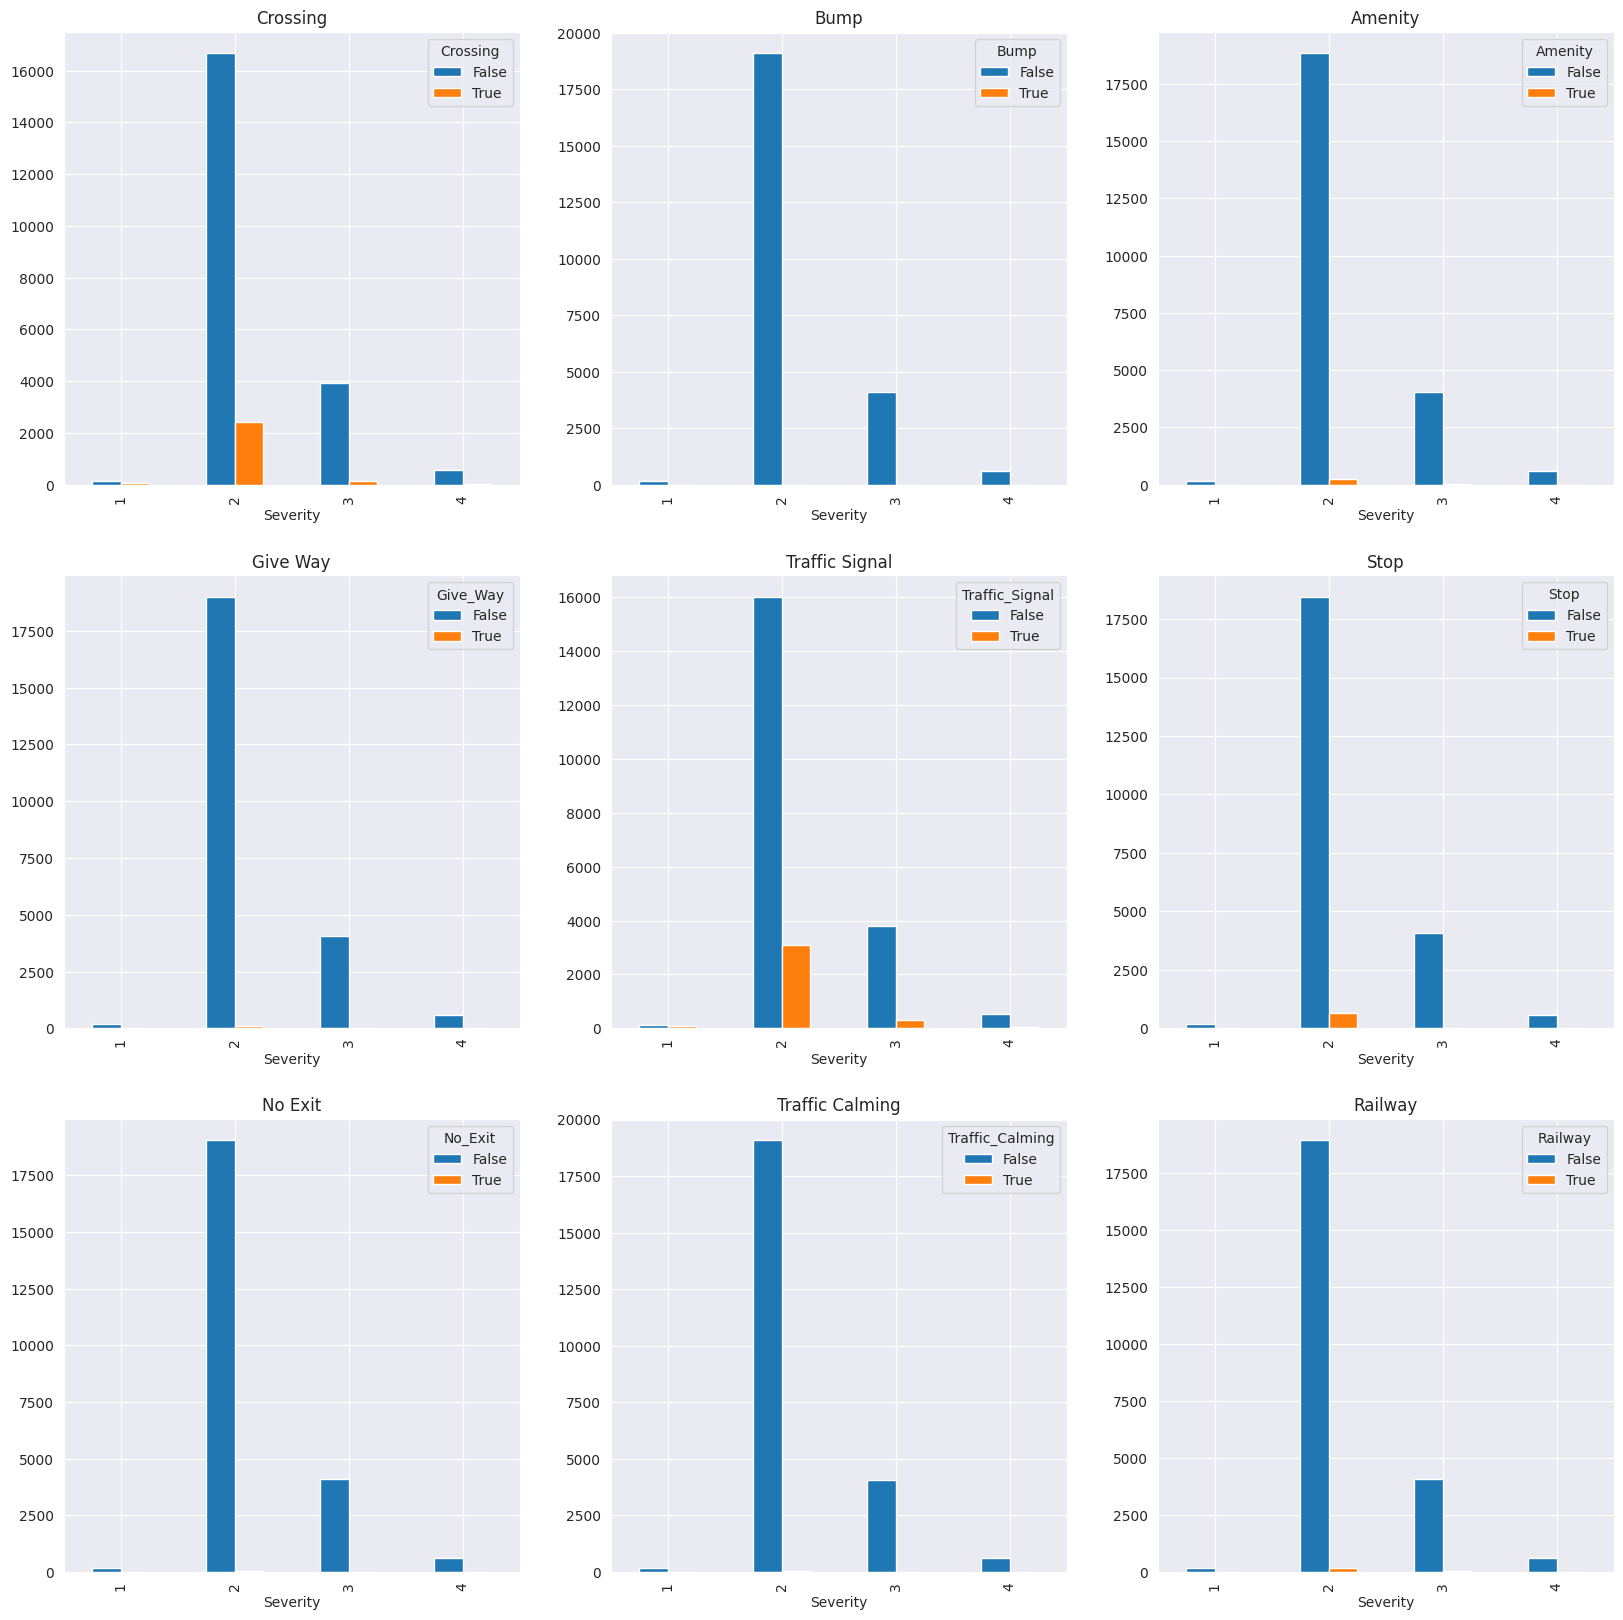

In [ ]:
fig, ax = plt.subplots(3,3, figsize=(20, 20))

crossing.unstack().plot(kind='bar', ax=ax[0,0], title="Crossing")
bump.unstack().plot(kind='bar', ax=ax[0,1], title="Bump")
amenity.unstack().plot(kind='bar', ax=ax[0,2], title="Amenity")
give_way.unstack().plot(kind='bar', ax=ax[1,0], title="Give Way")
traffic_signal.unstack().plot(kind='bar', ax=ax[1,1], title="Traffic Signal")
stop.unstack().plot(kind='bar', ax=ax[1,2], title="Stop")
no_exit.unstack().plot(kind='bar', ax=ax[2,0], title="No Exit")
traffic_calming.unstack().plot(kind='bar', ax=ax[2,1], title="Traffic Calming")
railway.unstack().plot(kind='bar', ax=ax[2,2], title="Railway")

**FINDING ALL NUMERICAL COLUMNS IN DATASET**

In [ ]:
null_cols = [i for i in df.columns if df[i].isnull().any()]
print(null_cols)

['End_Lat', 'End_Lng', 'Street', 'Zipcode', 'Timezone', 'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']


**DROPPING SPECIFIED COLUMNS ("END_LNG" AND "END_LAT") FROM THE DATAFRAME, REMOVING ROWS WITH MISSING VALUES IN SPECIFIC COLUMNS, AND THEN CHECKING FOR NULL VALUES IN THE RESULTING DATAFRAME.**

In [ ]:
new_data_a = df.drop(columns=["End_Lng", "End_Lat"], axis=0)
new_data_b = new_data_a.dropna(subset = ['Visibility(mi)','Weather_Condition','Humidity(%)','Temperature(F)','Wind_Direction','Pressure(in)','Weather_Timestamp','Airport_Code','Timezone','Zipcode','Sunrise_Sunset','Civil_Twilight','Nautical_Twilight','Astronomical_Twilight','City','Description'])
new_data_b.isnull().sum()

ID                          0
Source                      0
Severity                    0
Start_Time                  0
End_Time                    0
Start_Lat                   0
Start_Lng                   0
Distance(mi)                0
Description                 0
Street                     27
City                        0
County                      0
State                       0
Zipcode                     0
Country                     0
Timezone                    0
Airport_Code                0
Weather_Timestamp           0
Temperature(F)              0
Wind_Chill(F)            5527
Humidity(%)                 0
Pressure(in)                0
Visibility(mi)              0
Wind_Direction              0
Wind_Speed(mph)          1163
Precipitation(in)        6335
Weather_Condition           0
Amenity                     0
Bump                        0
Crossing                    0
Give_Way                    0
Junction                    0
No_Exit                     0
Railway   

**CREATING RESULTING FINAL DATASET AFTER PROCESSING**

In [ ]:
final_data = new_data_b.drop(columns = 'ID', axis=0)
final_data.isnull().sum()

Source                      0
Severity                    0
Start_Time                  0
End_Time                    0
Start_Lat                   0
Start_Lng                   0
Distance(mi)                0
Description                 0
Street                     27
City                        0
County                      0
State                       0
Zipcode                     0
Country                     0
Timezone                    0
Airport_Code                0
Weather_Timestamp           0
Temperature(F)              0
Wind_Chill(F)            5527
Humidity(%)                 0
Pressure(in)                0
Visibility(mi)              0
Wind_Direction              0
Wind_Speed(mph)          1163
Precipitation(in)        6335
Weather_Condition           0
Amenity                     0
Bump                        0
Crossing                    0
Give_Way                    0
Junction                    0
No_Exit                     0
Railway                     0
Roundabout

In [ ]:
state_counts = final_data["State"].value_counts()
print("State Code: ", final_data.State.unique())
print("Total No. of State in Dataset: ", len(final_data.State.unique()))

State Code:  ['LA' 'VA' 'CA' 'MN' 'MA' 'OR' 'FL' 'TX' 'IN' 'MT' 'AL' 'AZ' 'NY' 'NC'
 'SC' 'KS' 'MI' 'CO' 'GA' 'IL' 'PA' 'NM' 'NV' 'NE' 'NJ' 'TN' 'RI' 'MS'
 'MD' 'IA' 'UT' 'WA' 'MO' 'OH' 'OK' 'CT' 'DC' 'WV' 'KY' 'WI' 'AR' 'NH'
 'WY' 'DE' 'VT' 'ID' 'ME' 'ND']
Total No. of State in Dataset:  48


##PLOTTING COUNT OF ACCIDENTS FOR EACH STATE.

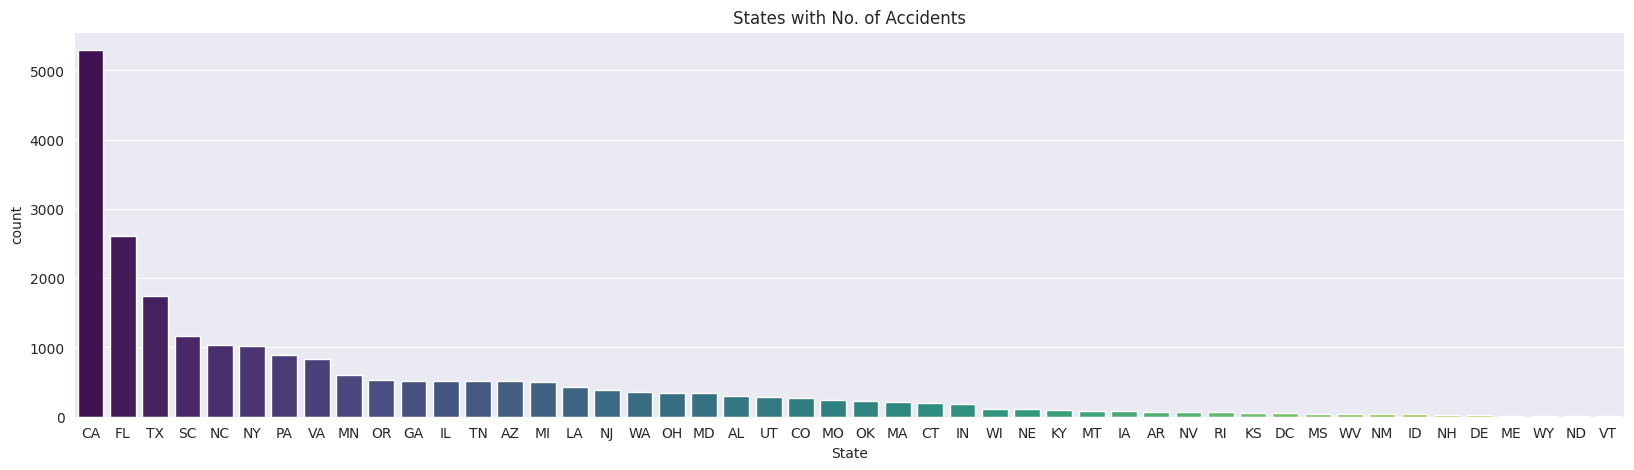

In [ ]:
fig, ax = plt.subplots(figsize = (20,5))
c = sns.countplot(x="State", data=final_data, orient = 'v', palette = "viridis", order = final_data['State'].value_counts().index)
c.set_title("States with No. of Accidents");

California(CA) is the State with highest no. of accidents.

##PLOTTING TOP 50 CITIES WITH HIGHEST NO. OF ACCIDENTS

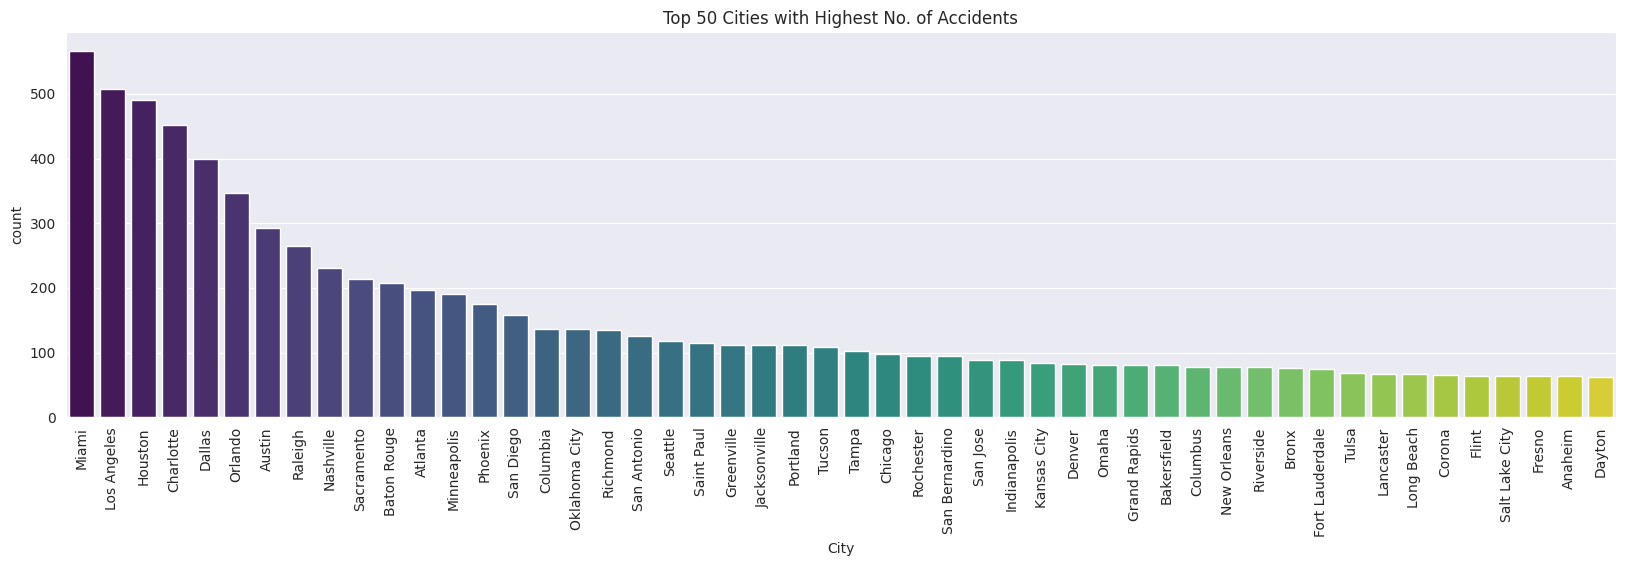

In [ ]:
fig, ax = plt.subplots(figsize = (20,5))
c = sns.countplot(x="City", data=final_data, order=final_data.City.value_counts().iloc[:50].index, orient = 'v', palette = "viridis")
c.set_title("Top 50 Cities with Highest No. of Accidents")
c.set_xticklabels(c.get_xticklabels(), rotation=90)
plt.show()

Miami is the city with highest no. of accidents in US.

##PLOTTING NUMBER OF ACCIDENTS YEAR WISE

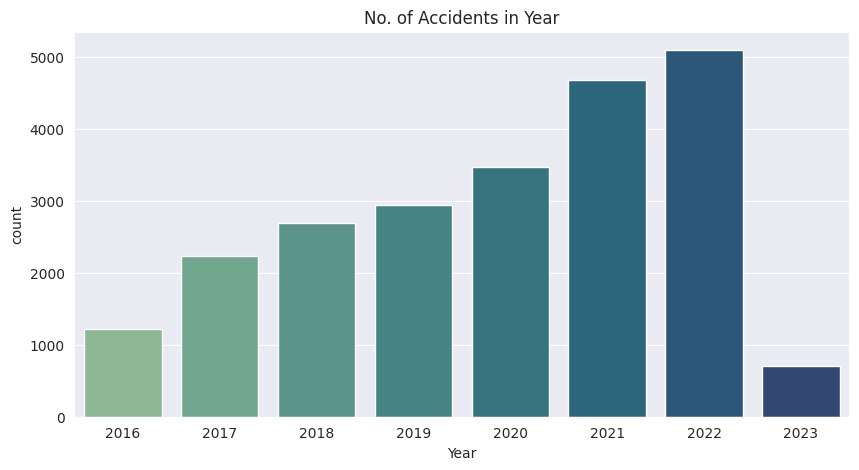

In [ ]:
final_data.Start_Time = pd.to_datetime(final_data.Start_Time)
final_data.Start_Time[0]
final_data['Month'] = final_data['Start_Time'].dt.month
final_data['Year'] = final_data['Start_Time'].dt.year
final_data['Hour'] = final_data['Start_Time'].dt.hour
final_data['Weekday'] = final_data['Start_Time'].dt.weekday
#yearly data subset
data_2016 = final_data[final_data.Start_Time.dt.year == 2016]
data_2017 = final_data[final_data.Start_Time.dt.year == 2017]
data_2018 = final_data[final_data.Start_Time.dt.year == 2018]
data_2019 = final_data[final_data.Start_Time.dt.year == 2019]
data_2020 = final_data[final_data.Start_Time.dt.year == 2020]
data_2017_2019 = final_data[(final_data["Year"] >= 2017) & (final_data["Year"] <= 2019)]
fig, ax = plt.subplots(figsize = (10,5))
c = sns.countplot(x="Year", data=final_data, orient = 'v', palette = "crest")
plt.annotate('Data Not Available',xy=(-0.4,500000), fontsize=11)
c.set_title("No. of Accidents in Year")
for i in ax.patches:
    count = '{:,.0f}'.format(i.get_height())
    x = i.get_x()+i.get_width()-0.60
    y = i.get_height()+10000
    ax.annotate(count, (x, y))
plt.show()

Highest number of accidents occured in year 2022.

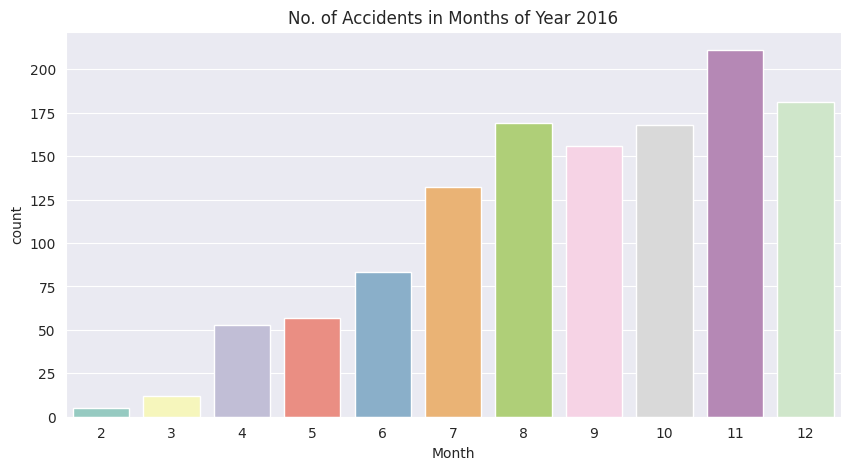

In [ ]:
fig, ax = plt.subplots(figsize = (10,5))
c = sns.countplot(x="Month", data=data_2016, orient = 'v', palette = "Set3")
plt.annotate('Data Not Available',xy=(2,50000), fontsize=11)
c.set_title("No. of Accidents in Months of Year 2016")
plt.show()

In year 2016, most no. of accidents happened in 11th month i.e November.

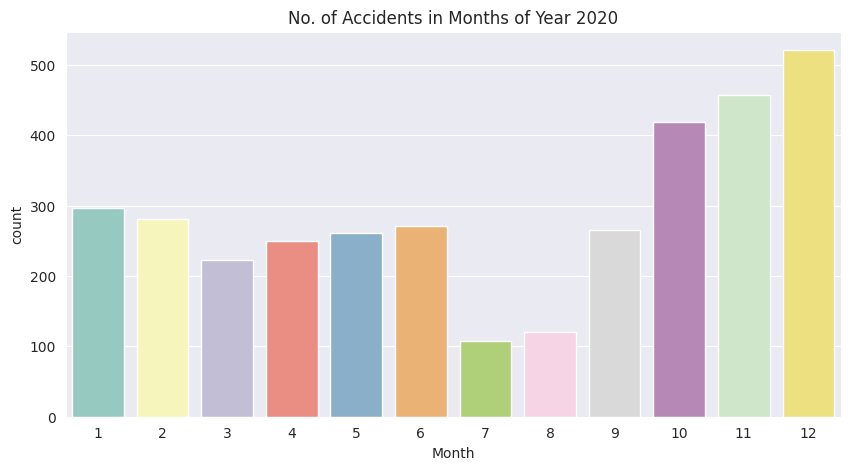

In [ ]:
fig, ax = plt.subplots(figsize = (10,5))
c = sns.countplot(x="Month", data=data_2020, orient = 'v', palette = "Set3")
c.set_title("No. of Accidents in Months of Year 2020")
plt.show()

In year 2020, most no. of accidents happened in 12th month i.e December.

##CONCLUSION

In conclusion, the analysis of the US traffic accident dataset spanning from 2016 to 2023 has provided valuable insights into patterns related to road conditions, weather, and time of day. Geographic distribution was visualized through scatter plots, showcasing accident hotspots.

Further exploration involved segregating accidents based on severity levels, offering a comprehensive understanding of their impact. A series of pie charts provided a clear depiction of the distribution of accidents across states, emphasizing the severity levels.

The dataset underwent preprocessing by dropping specified columns and removing rows with missing values. Finally, a detailed exploration of accident counts across states was visually represented through both pie charts and a bar plot, shedding light on the states with the highest occurrences.

The exploration of accident distribution was approached comprehensively by leveraging various visualization techniques. Bar plots, histogram plots, pie charts, and scatter plots were instrumental in unveiling intricate patterns across diverse features of the dataset.

These visualizations collectively provided a nuanced understanding of how road conditions, weather, time of day, severity levels, and geographic factors contribute to the overall landscape of traffic accidents.

Such a holistic examination empowers stakeholders to identify hotspots, assess the impact of varying factors, and formulate data-driven strategies for enhancing road safety and accident prevention.

This comprehensive analysis serves as a foundation for informed decision-making to enhance road safety, implement targeted preventive measures, and effectively manage traffic incidents.

##A big thank you to **Prodigy InfoTech** for this wonderful opportunity! I'm grateful for the mentors and the team for their amazing support. This experience boosted my skills in data science and analysis. I'm excited to use this knowledge ahead. Thanks for this incredible learning experience!